In [1]:
### Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Pre processing

In [3]:
# Drop unnecessary columns
data= data.drop('Unnamed: 0', axis=1)
data = data.drop('id', axis=1)
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# Check for duplicates
data.duplicated().sum()

0

In [5]:
# Describing the dataset
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
# checking missing values
data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [8]:
# Assuming df is your DataFrame and 'Arrival Delay in Minutes' is the column to be imputed
mean_value = data['Arrival Delay in Minutes'].mean()
data['Arrival Delay in Minutes'].fillna(mean_value, inplace=True)


In [9]:
# selecting categorical data
cat_features = data.select_dtypes('object').columns.to_list()

# categorical features and their categories
pd.DataFrame(
    {col: [list(data[col].unique())] 
     for col in cat_features},
    index=['Categories']
).T

,Categories
Gender,"[Male, Female]"
Customer Type,"[Loyal Customer, disloyal Customer]"
Type of Travel,"[Personal Travel, Business travel]"
Class,"[Eco Plus, Business, Eco]"
satisfaction,"[neutral or dissatisfied, satisfied]"


In [10]:
# Check the actual column names in your DataFrame
print(data.columns)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [11]:
ordinal_columns = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

# categorical features and their categories
pd.DataFrame(
    {col: [list(data[col].unique())] 
     for col in ordinal_columns},
    index=['Categories']
).T

,Categories
Inflight wifi service,"[3, 2, 4, 1, 5, 0]"
Departure/Arrival time convenient,"[4, 2, 5, 3, 1, 0]"
Ease of Online booking,"[3, 2, 5, 4, 1, 0]"
Gate location,"[1, 3, 2, 5, 4, 0]"
Food and drink,"[5, 1, 2, 4, 3, 0]"
Online boarding,"[3, 5, 2, 1, 4, 0]"
Seat comfort,"[5, 1, 2, 3, 4, 0]"
Inflight entertainment,"[5, 1, 2, 3, 4, 0]"
On-board service,"[4, 1, 2, 3, 5, 0]"
Leg room service,"[3, 5, 4, 2, 1, 0]"


In [12]:
# List of columns containing ordinal variables

# Replace 0 with 1 in the specified columns
data[ordinal_columns] = data[ordinal_columns].replace(0, 1)

# categorical features and their categories
pd.DataFrame(
    {col: [list(data[col].unique())] 
     for col in ordinal_columns},
    index=['Categories']
).T

,Categories
Inflight wifi service,"[3, 2, 4, 1, 5]"
Departure/Arrival time convenient,"[4, 2, 5, 3, 1]"
Ease of Online booking,"[3, 2, 5, 4, 1]"
Gate location,"[1, 3, 2, 5, 4]"
Food and drink,"[5, 1, 2, 4, 3]"
Online boarding,"[3, 5, 2, 1, 4]"
Seat comfort,"[5, 1, 2, 3, 4]"
Inflight entertainment,"[5, 1, 2, 3, 4]"
On-board service,"[4, 1, 2, 3, 5]"
Leg room service,"[3, 5, 4, 2, 1]"


## Uni variate analysis 

In [13]:
data['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

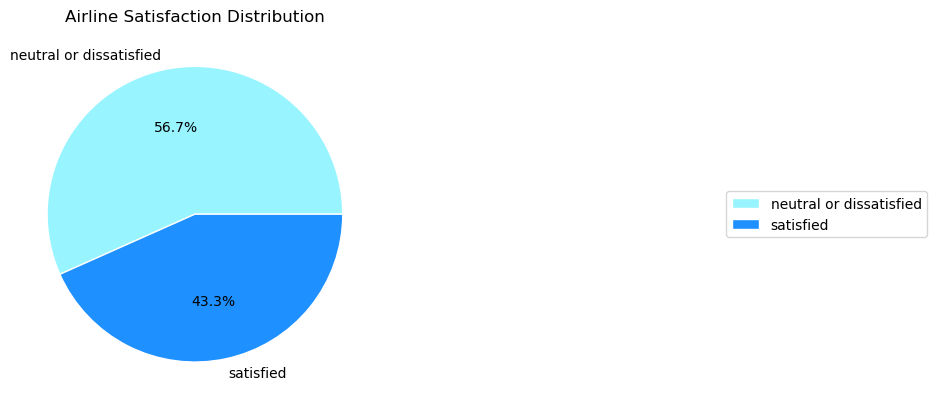

In [14]:
# Pie Chart for the response: Satisfaction

# Calculate the count of each AQI category
category_counts = data['satisfaction'].value_counts()

# Define custom colors for the pie chart
custom_colors = ['#98F5FF', '#1E90FF']

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=custom_colors, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Airline Satisfaction Distribution')

# Move the labels outside the pie chart
plt.legend(bbox_to_anchor=(2.5, 0.5), loc='center right')

# Display the pie chart
plt.show()

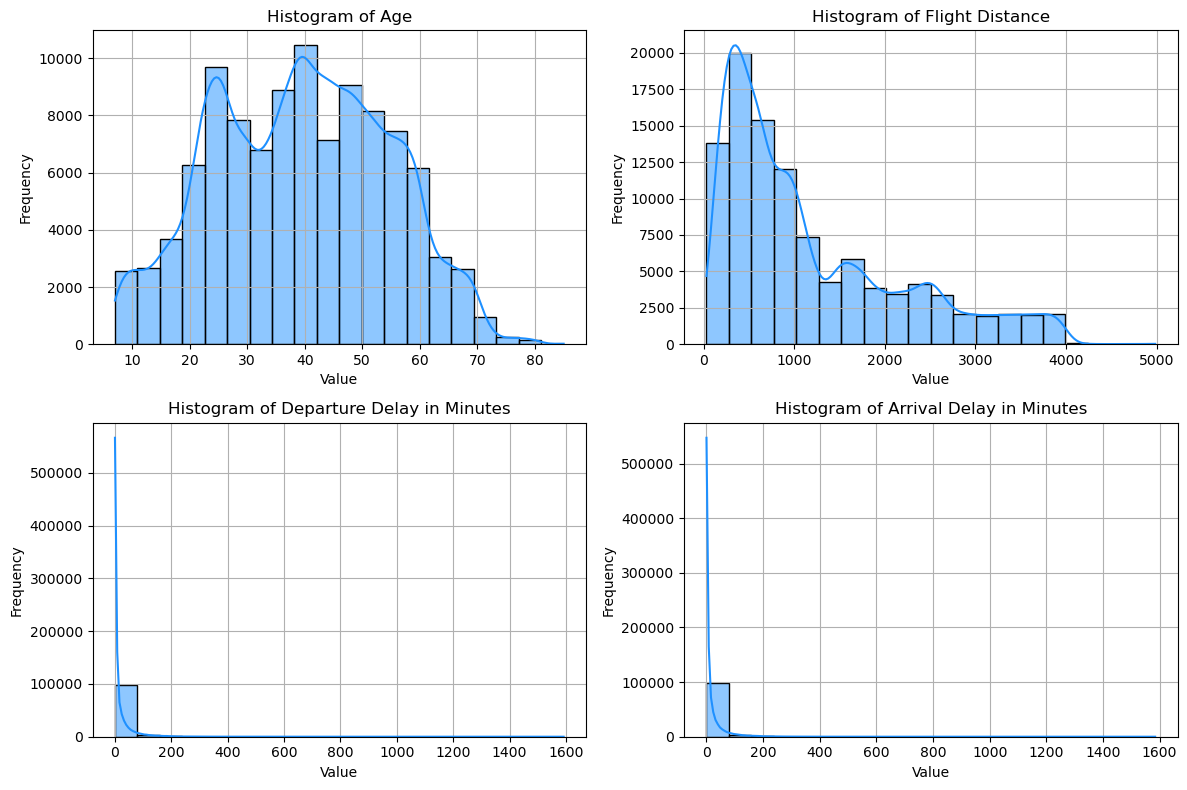

In [15]:
# Select the numeric variables for histograms
numeric_vars = ['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create histograms for each numeric variable
for i, var in enumerate(numeric_vars):
    sns.histplot(data=data[var], bins=20, kde=True, ax=axes[i],color='#1E90FF')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {var}')
    axes[i].grid(True)

# Adjust layout and display the histograms
plt.tight_layout()
plt.show()


# Bi variate Analysis

#### continues variables

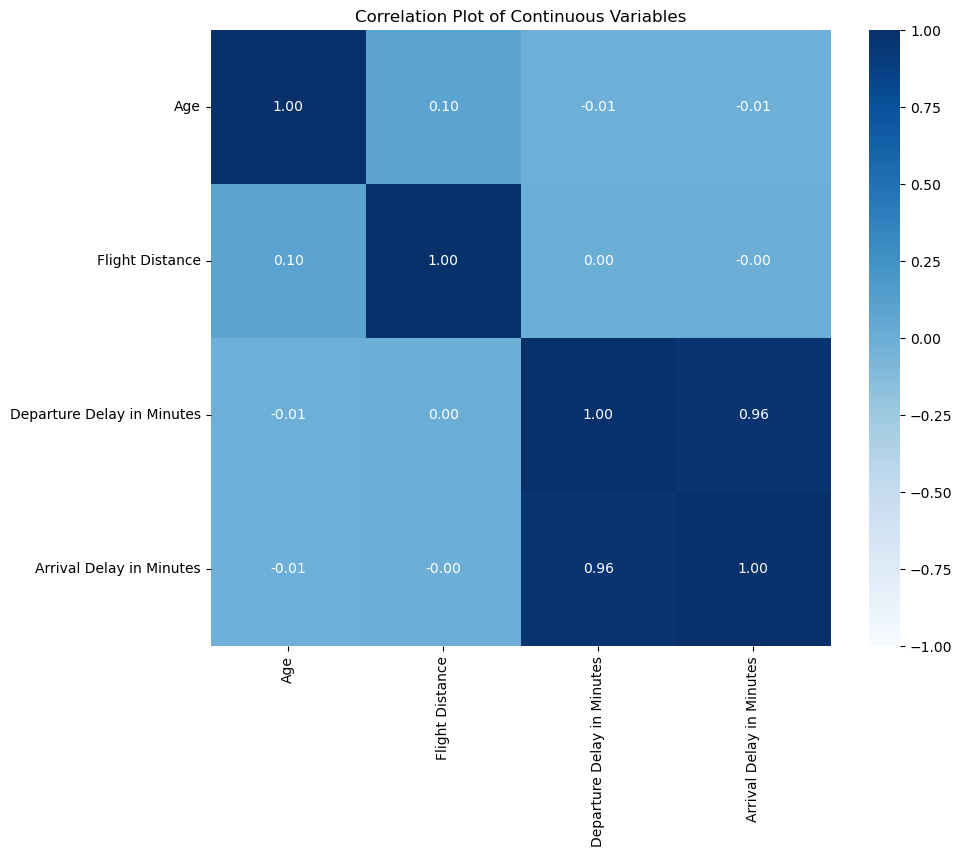

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
continuous_variables = ["Age",'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Calculate the correlation matrix
correlation_matrix = data[continuous_variables].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", vmin=-1, vmax=1)

# Set plot title
plt.title('Correlation Plot of Continuous Variables')

# Show the plot
plt.show()


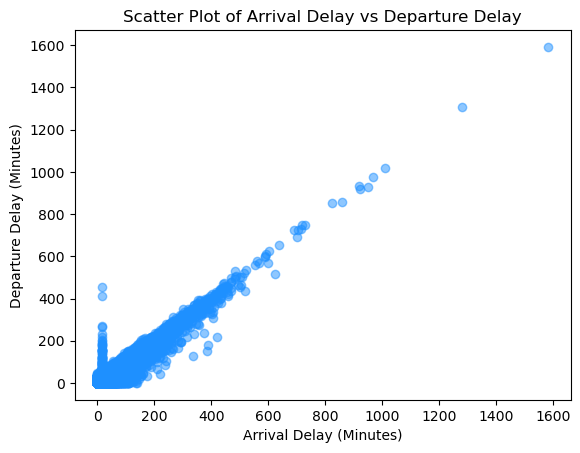

In [17]:
plt.scatter(data['Arrival Delay in Minutes'], data['Departure Delay in Minutes'], alpha=0.5, color='#1E90FF')
plt.xlabel('Arrival Delay (Minutes)')
plt.ylabel('Departure Delay (Minutes)')
plt.title('Scatter Plot of Arrival Delay vs Departure Delay')
plt.show()


In [18]:
#### continues variableswith response 

C:\Users\ACER.LAPTOP-9LUK3RE6\AppData\Local\Temp\ipykernel_13184\1318671407.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


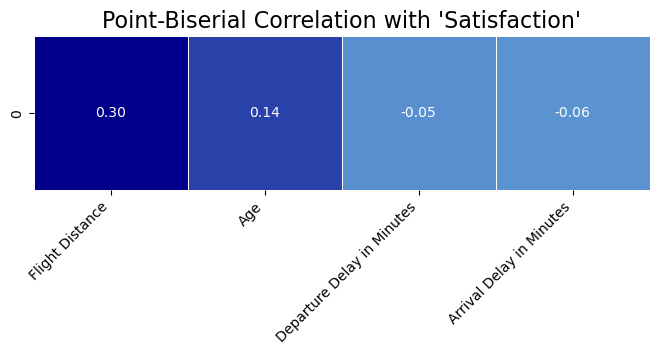

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

# Assuming 'data' is your DataFrame containing variables including 'satisfaction' as a categorical response

# Map categorical satisfaction values to numerical
data['satisfaction_encoded'] = np.where(data['satisfaction'] == 'satisfied', 1, 0)

# Select the numeric variables for the heatmap
numeric_vars = ["Age", 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Initialize an empty correlation matrix
correlation_matrix = pd.DataFrame(index=numeric_vars, columns=['Point-Biserial Corr Coeffi'])

# Calculate point-biserial correlation coefficient for each numeric variable
for var in numeric_vars:
    pb_corr_coeff, _ = pointbiserialr(data['satisfaction_encoded'], data[var])
    correlation_matrix.loc[var] = pb_corr_coeff

# Convert the correlation values to numeric for correct plotting
correlation_matrix['Point-Biserial Corr Coeffi'] = pd.to_numeric(correlation_matrix['Point-Biserial Corr Coeffi'])

# Sort correlations from highest to lowest
sorted_correlations = correlation_matrix['Point-Biserial Corr Coeffi'].sort_values(ascending=False)

# Reshape sorted_correlations into a 1xN array for plotting
correlation_matrix = np.array(sorted_correlations).reshape(1, -1)

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 2))

# Create a custom color map with shades of '#FFD700'
cmap = sns.blend_palette(['#98F5FF', '#00008B'], as_cmap=True)

# Plot the correlation values as a heatmap-style visualization
sns.heatmap(correlation_matrix, cmap=cmap, center=0, annot=True, fmt=".2f", square=True, linewidths=0.5, cbar=False, ax=ax)

# Set the x-axis labels to the variable names
ax.set_xticklabels(sorted_correlations.index, rotation=45, ha='right')

# Set the title of the plot
ax.set_title("Point-Biserial Correlation with 'Satisfaction'", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


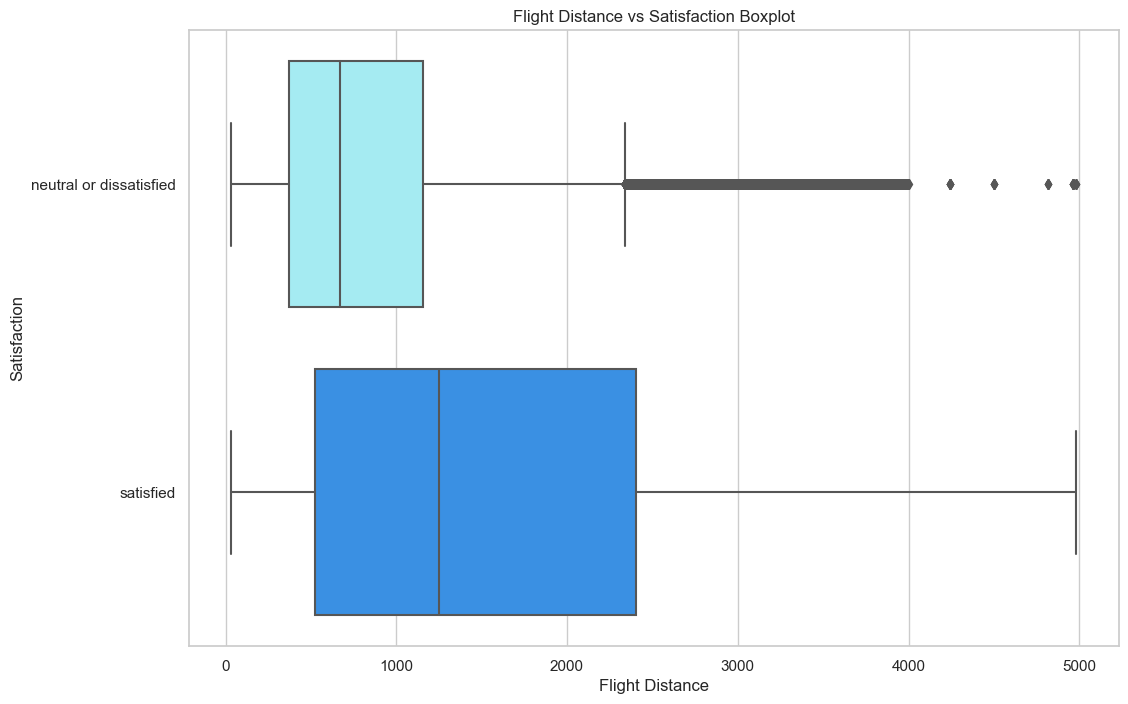

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Define the colors for neutral/dissatisfied and satisfied categories
colors = {'neutral or dissatisfied': '#98F5FF', 'satisfied': '#1E90FF'}

# Create the horizontal boxplot for Flight Distance vs Satisfaction
plt.figure(figsize=(12, 8))
sns.boxplot(x='Flight Distance', y='satisfaction', data=data, orient='h', palette=colors)

# Set plot labels and title
plt.xlabel('Flight Distance')
plt.ylabel('Satisfaction')
plt.title('Flight Distance vs Satisfaction Boxplot')

# Show the plot
plt.show()


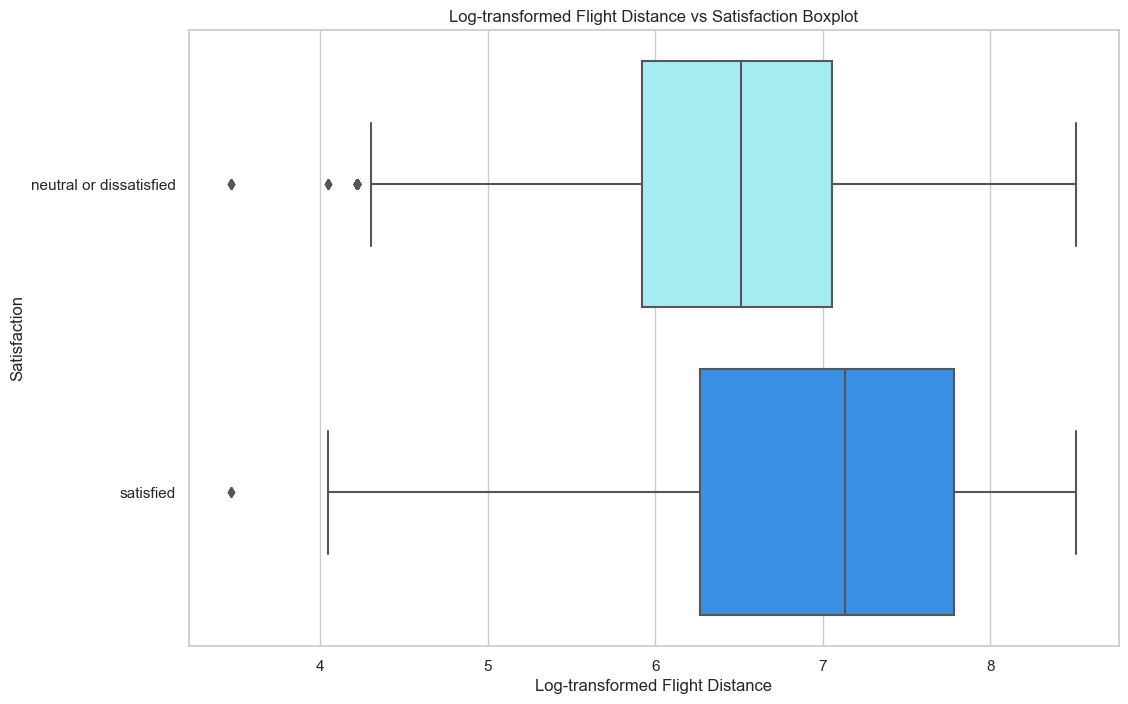

In [21]:
# Perform log transformation on 'Flight Distance'
data['Flight Distance Log'] = np.log1p(data['Flight Distance'])

# Set the style for the plot
sns.set(style="whitegrid")

# Define the colors for neutral/dissatisfied and satisfied categories
colors = {'neutral or dissatisfied': '#98F5FF', 'satisfied': '#1E90FF'}

# Create the horizontal boxplot for Log-transformed Flight Distance vs Satisfaction
plt.figure(figsize=(12, 8))
sns.boxplot(x='Flight Distance Log', y='satisfaction', data=data, orient='h', palette=colors)

# Set plot labels and title
plt.xlabel('Log-transformed Flight Distance')
plt.ylabel('Satisfaction')
plt.title('Log-transformed Flight Distance vs Satisfaction Boxplot')

# Show the plot
plt.show()


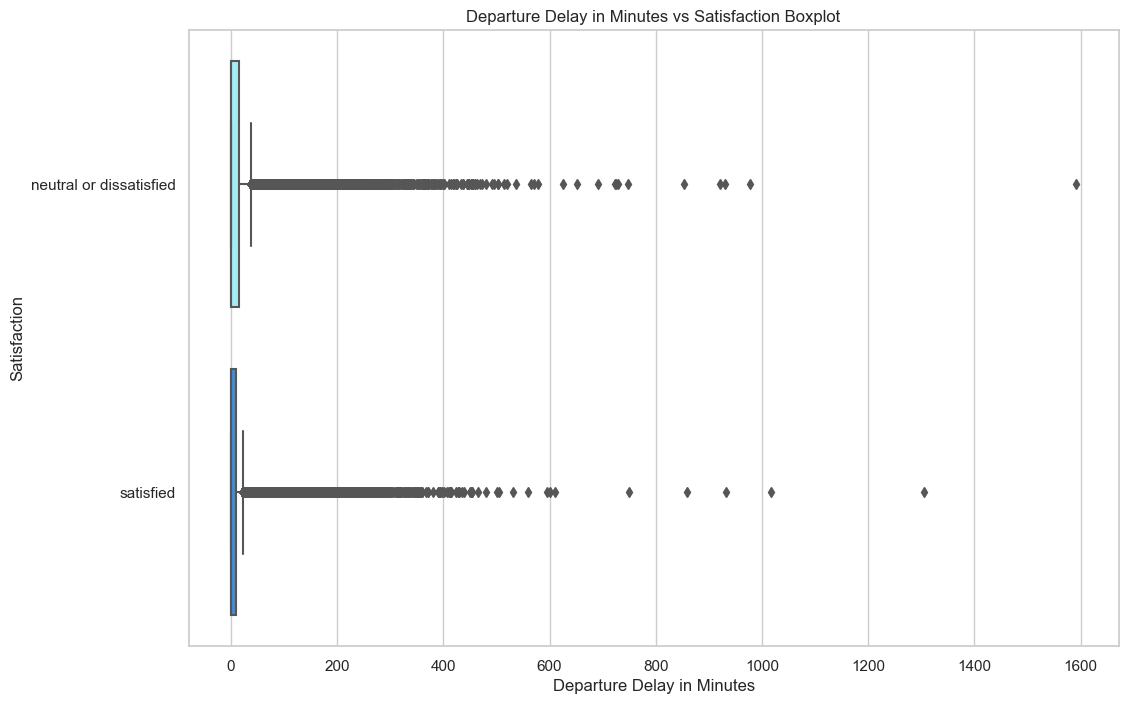

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Define the colors for neutral/dissatisfied and satisfied categories
colors = {'neutral or dissatisfied': '#98F5FF', 'satisfied': '#1E90FF'}

# Create the horizontal boxplot for Flight Distance vs Satisfaction
plt.figure(figsize=(12, 8))
sns.boxplot(x='Departure Delay in Minutes', y='satisfaction', data=data, orient='h', palette=colors)

# Set plot labels and title
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Satisfaction')
plt.title('Departure Delay in Minutes vs Satisfaction Boxplot')

# Show the plot
plt.show()


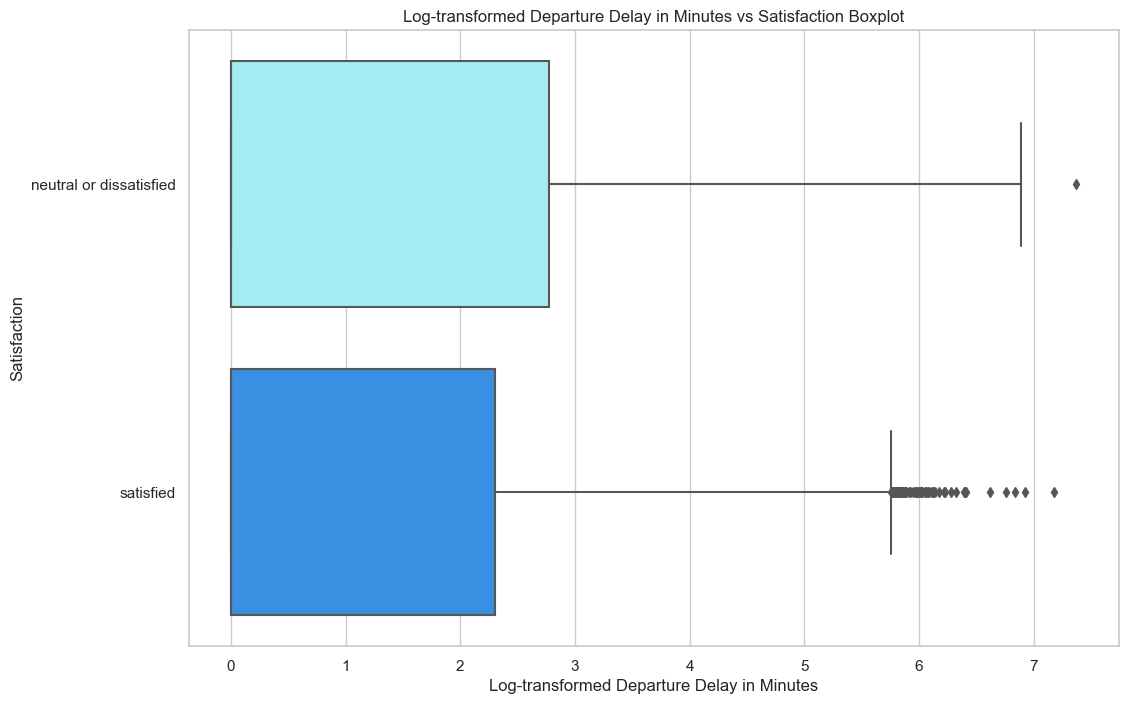

In [23]:
# Perform log transformation on 'Flight Distance'
data['Departure Delay in Minutes Log'] = np.log1p(data['Departure Delay in Minutes'])

# Set the style for the plot
sns.set(style="whitegrid")

# Define the colors for neutral/dissatisfied and satisfied categories
colors = {'neutral or dissatisfied': '#98F5FF', 'satisfied': '#1E90FF'}

# Create the horizontal boxplot for Log-transformed Flight Distance vs Satisfaction
plt.figure(figsize=(12, 8))
sns.boxplot(x='Departure Delay in Minutes Log', y='satisfaction', data=data, orient='h', palette=colors)

# Set plot labels and title
plt.xlabel('Log-transformed Departure Delay in Minutes')
plt.ylabel('Satisfaction')
plt.title('Log-transformed Departure Delay in Minutes vs Satisfaction Boxplot')

# Show the plot
plt.show()


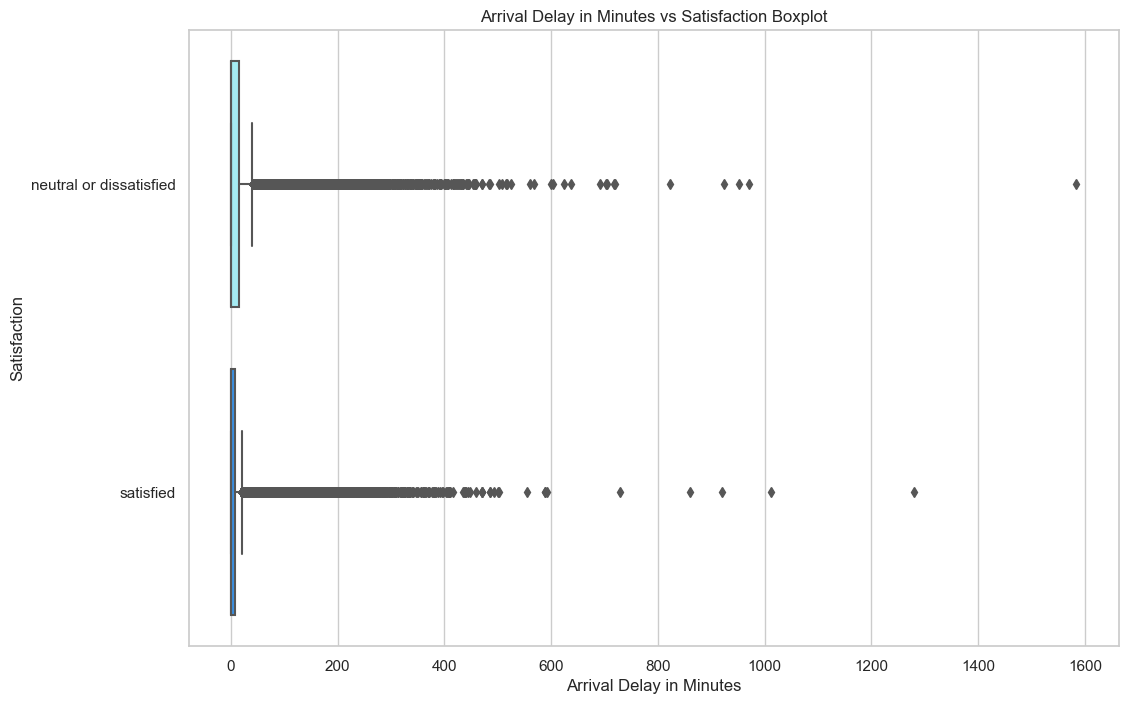

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Define the colors for neutral/dissatisfied and satisfied categories
colors = {'neutral or dissatisfied': '#98F5FF', 'satisfied': '#1E90FF'}

# Create the horizontal boxplot for Flight Distance vs Satisfaction
plt.figure(figsize=(12, 8))
sns.boxplot(x='Arrival Delay in Minutes', y='satisfaction', data=data, orient='h', palette=colors)

# Set plot labels and title
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Satisfaction')
plt.title('Arrival Delay in Minutes vs Satisfaction Boxplot')

# Show the plot
plt.show()


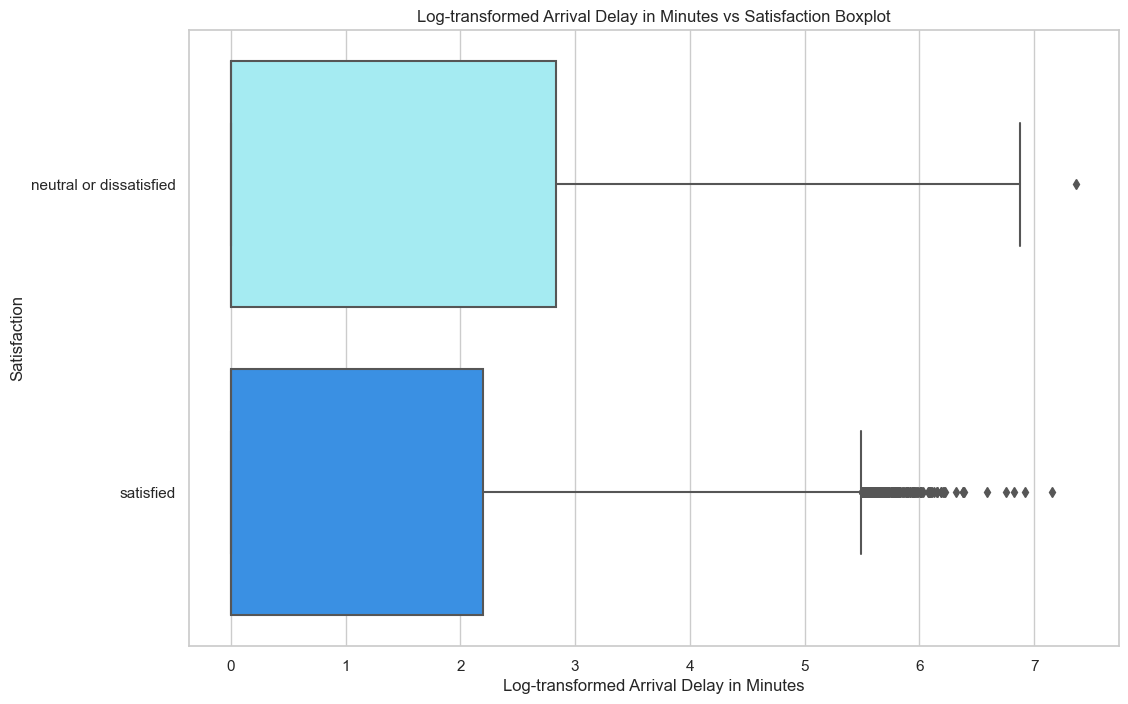

In [26]:
# Perform log transformation on 'Flight Distance'
data['Arrival Delay in Minutes Log'] = np.log1p(data['Arrival Delay in Minutes'])

# Set the style for the plot
sns.set(style="whitegrid")

# Define the colors for neutral/dissatisfied and satisfied categories
colors = {'neutral or dissatisfied': '#98F5FF', 'satisfied': '#1E90FF'}

# Create the horizontal boxplot for Log-transformed Flight Distance vs Satisfaction
plt.figure(figsize=(12, 8))
sns.boxplot(x='Arrival Delay in Minutes Log', y='satisfaction', data=data, orient='h', palette=colors)

# Set plot labels and title
plt.xlabel('Log-transformed Arrival Delay in Minutes')
plt.ylabel('Satisfaction')
plt.title('Log-transformed Arrival Delay in Minutes vs Satisfaction Boxplot')

# Show the plot
plt.show()


C:\Users\ACER.LAPTOP-9LUK3RE6\AppData\Local\Temp\ipykernel_13184\3495470932.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loyal_customers['Log Arrival Delay'] = np.log1p(loyal_customers['Arrival Delay in Minutes'])
C:\Users\ACER.LAPTOP-9LUK3RE6\AppData\Local\Temp\ipykernel_13184\3495470932.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disloyal_customers['Log Arrival Delay'] = np.log1p(disloyal_customers['Arrival Delay in Minutes'])


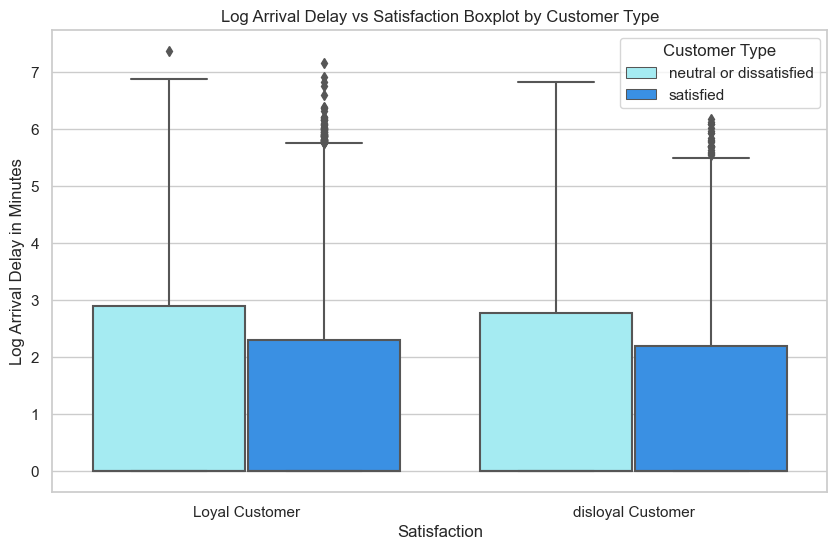

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data by Customer Type ('Loyal Customer' and 'disloyal Customer')
loyal_customers = data[data['Customer Type'] == 'Loyal Customer']
disloyal_customers = data[data['Customer Type'] == 'disloyal Customer']

# Apply log transformation to 'Arrival Delay in Minutes'
loyal_customers['Log Arrival Delay'] = np.log1p(loyal_customers['Arrival Delay in Minutes'])
disloyal_customers['Log Arrival Delay'] = np.log1p(disloyal_customers['Arrival Delay in Minutes'])

# Combine the filtered dataframes
combined_data = pd.concat([loyal_customers, disloyal_customers])

# Define the colors for neutral/dissatisfied and satisfied categories
colors = {'neutral or dissatisfied': '#98F5FF', 'satisfied': '#1E90FF'}

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer Type', y='Log Arrival Delay', hue='satisfaction', data=combined_data, palette=colors)

# Set plot labels and title
plt.xlabel('Satisfaction')
plt.ylabel('Log Arrival Delay in Minutes')
plt.title('Log Arrival Delay vs Satisfaction Boxplot by Customer Type')

# Show the plot
plt.legend(title='Customer Type')
plt.show()


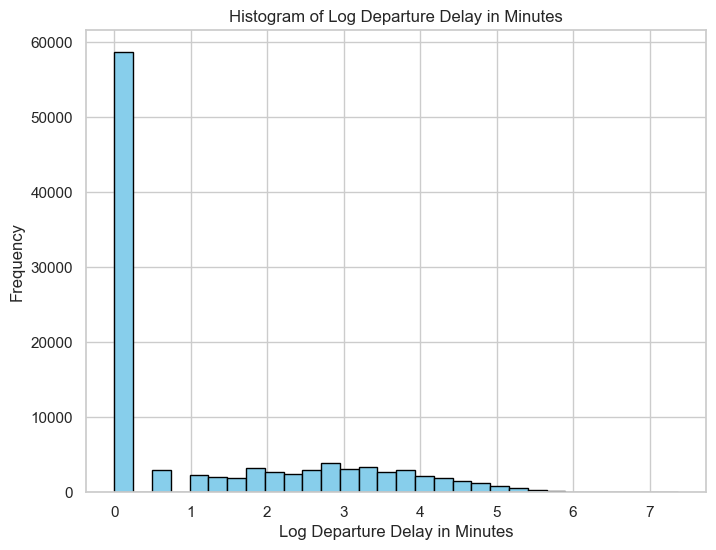

In [28]:
import matplotlib.pyplot as plt

# Plotting the histogram for 'Log Arrival Delay in Minutes'
plt.figure(figsize=(8, 6))
plt.hist(data["Departure Delay in Minutes Log"], bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Log Departure Delay in Minutes')
plt.ylabel('Frequency')
plt.title('Histogram of Log Departure Delay in Minutes')

# Show the plot
plt.grid(True)
plt.show()


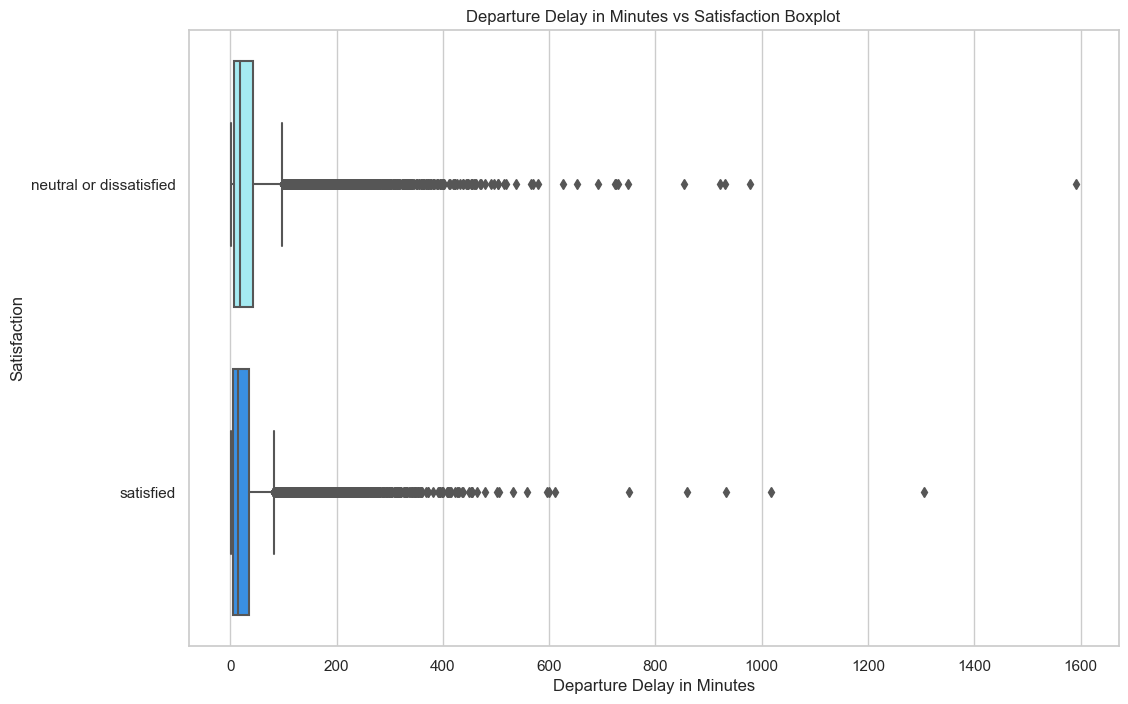

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Define the colors for neutral/dissatisfied and satisfied categories
colors = {'neutral or dissatisfied': '#98F5FF', 'satisfied': '#1E90FF'}

# Filter the data for Departure Delay == 0 and Departure Delay != 0
data_zeros = data[data['Departure Delay in Minutes'] == 0]
data_non_zeros = data[data['Departure Delay in Minutes'] != 0]

# Create two separate horizontal boxplots for Departure Delay in Minutes vs Satisfaction
plt.figure(figsize=(12, 8))
sns.boxplot(x='Departure Delay in Minutes', y='satisfaction', data=data_non_zeros, orient='h', palette=colors)

# Set plot labels and title
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Satisfaction')
plt.title('Departure Delay in Minutes vs Satisfaction Boxplot')

# Show the plot
plt.show()


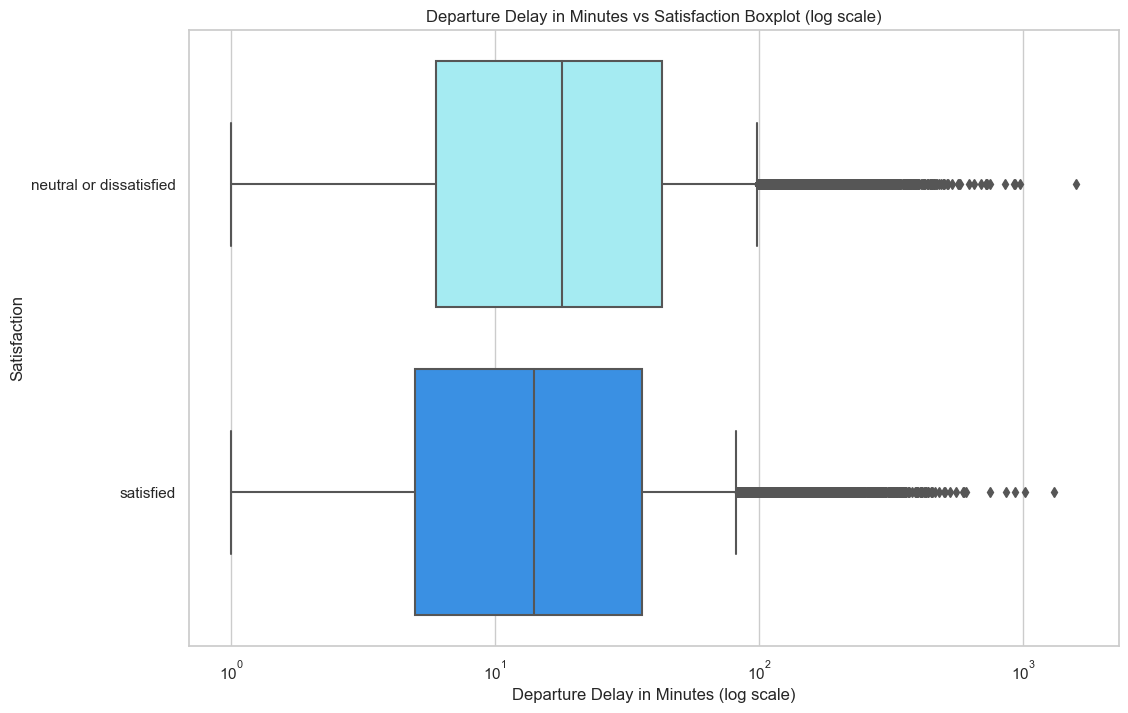

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Define the colors for neutral/dissatisfied and satisfied categories
colors = {'neutral or dissatisfied': '#98F5FF', 'satisfied': '#1E90FF'}

# Filter the data for Departure Delay == 0 and Departure Delay != 0
data_zeros = data[data['Departure Delay in Minutes'] == 0]
data_non_zeros = data[data['Departure Delay in Minutes'] != 0]

# Create a figure and axes with a logarithmic scale on x-axis
plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.set_xscale('log')

# Create a horizontal boxplot for Departure Delay in Minutes vs Satisfaction on a log scale
sns.boxplot(x='Departure Delay in Minutes', y='satisfaction', data=data_non_zeros, orient='h', palette=colors)

# Set plot labels and title
plt.xlabel('Departure Delay in Minutes (log scale)')
plt.ylabel('Satisfaction')
plt.title('Departure Delay in Minutes vs Satisfaction Boxplot (log scale)')

# Show the plot
plt.show()


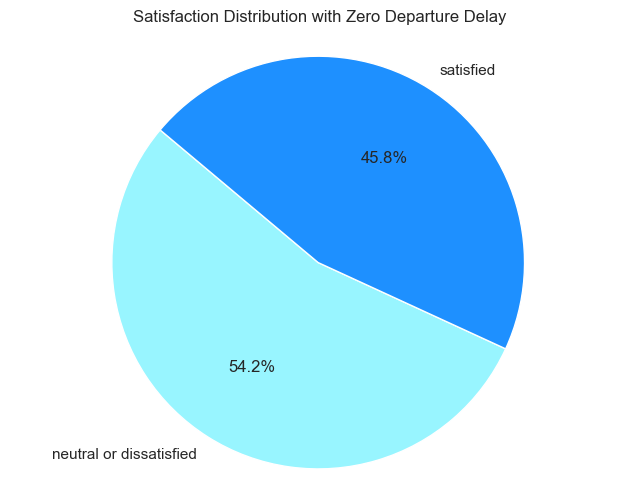

In [31]:
# Filter the data for Departure Delay == 0
data_zeros = data[data['Departure Delay in Minutes'] == 0]

# Count the occurrences of each satisfaction level
satisfaction_counts = data_zeros['satisfaction'].value_counts()

# Create a pie chart for satisfaction levels when Departure Delay is zero
plt.figure(figsize=(8, 6))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=140, colors=['#98F5FF', '#1E90FF'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Satisfaction Distribution with Zero Departure Delay')
plt.show()


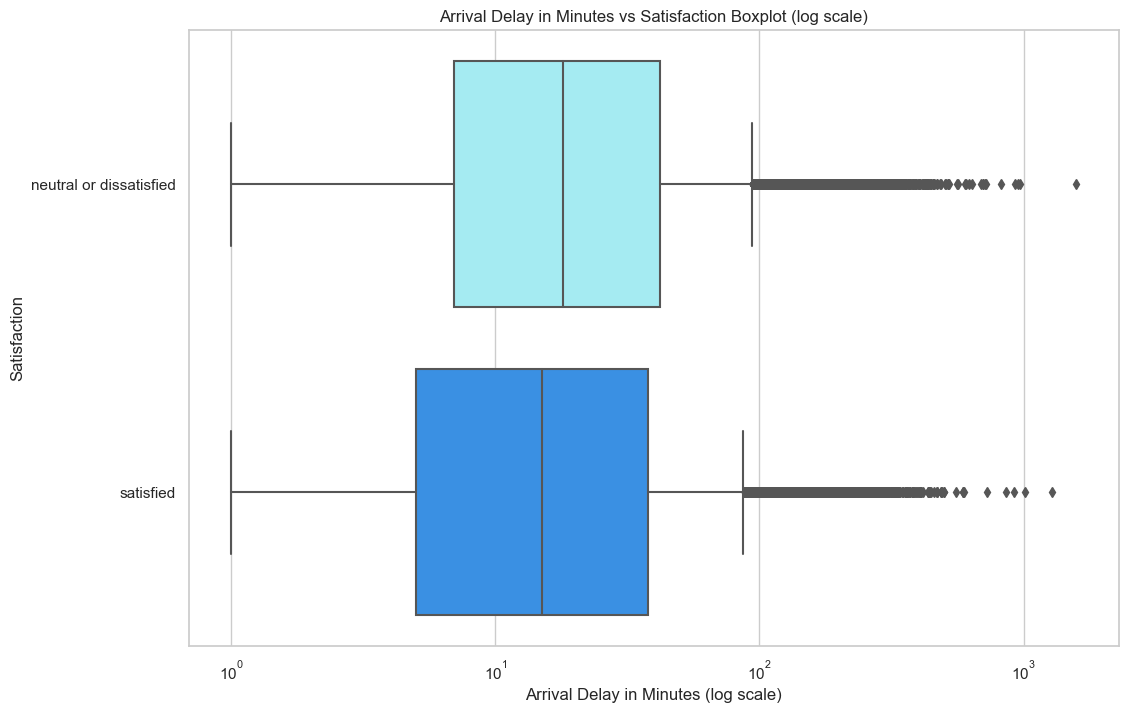

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Define the colors for neutral/dissatisfied and satisfied categories
colors = {'neutral or dissatisfied': '#98F5FF', 'satisfied': '#1E90FF'}

# Filter the data for Departure Delay == 0 and Departure Delay != 0
data_zeros = data[data['Arrival Delay in Minutes'] == 0]
data_non_zeros = data[data['Arrival Delay in Minutes'] != 0]

# Create a figure and axes with a logarithmic scale on x-axis
plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.set_xscale('log')

# Create a horizontal boxplot for Departure Delay in Minutes vs Satisfaction on a log scale
sns.boxplot(x='Arrival Delay in Minutes', y='satisfaction', data=data_non_zeros, orient='h', palette=colors)

# Set plot labels and title
plt.xlabel('Arrival Delay in Minutes (log scale)')
plt.ylabel('Satisfaction')
plt.title('Arrival Delay in Minutes vs Satisfaction Boxplot (log scale)')

# Show the plot
plt.show()


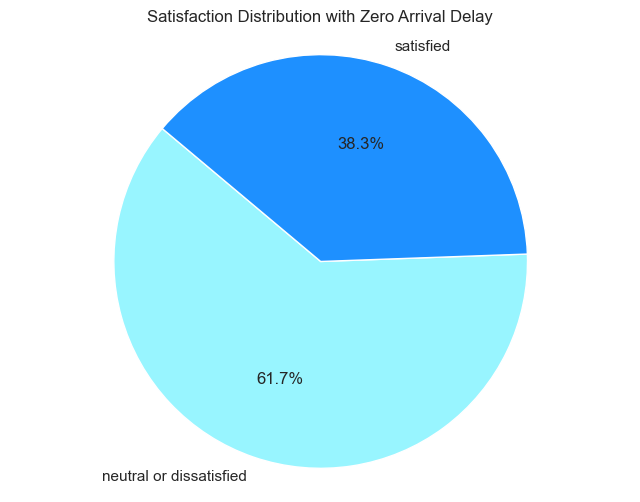

In [33]:
# Count the occurrences of each satisfaction level when Arrival Delay is zero
satisfaction_counts_arrival_zeros = data_non_zeros['satisfaction'].value_counts()

# Create a pie chart for satisfaction levels when Arrival Delay is zero
plt.figure(figsize=(8, 6))
plt.pie(satisfaction_counts_arrival_zeros, labels=satisfaction_counts_arrival_zeros.index, autopct='%1.1f%%', startangle=140, colors=['#98F5FF', '#1E90FF'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Satisfaction Distribution with Zero Arrival Delay')
plt.show()


### ordinal variables

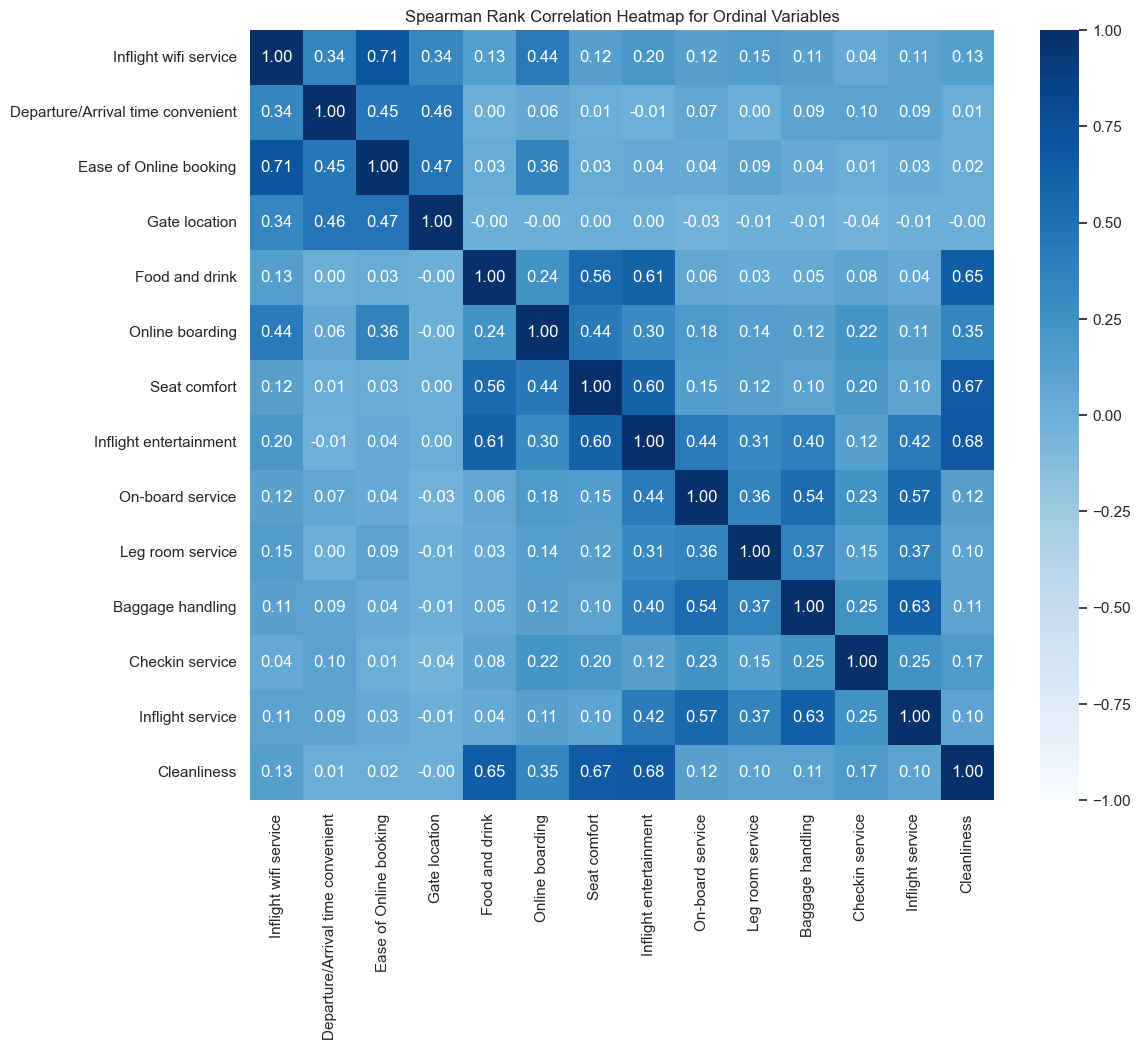

In [34]:
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr

# Assuming 'data' is your DataFrame and satisfaction_variables is the list of ordinal columns
ordinal_data = data[ordinal_columns]

# Calculate Spearman rank correlation matrix
correlation_matrix = ordinal_data.corr(method='spearman')

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix,annot=True, cmap='Blues', fmt=".2f", vmin=-1, vmax=1)

# Set plot title
plt.title('Spearman Rank Correlation Heatmap for Ordinal Variables')

# Show the plot
plt.show()


In [35]:
# Extracting the upper triangle of the correlation matrix to avoid duplicate pairs
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# Finding the top 5 correlations
top_correlations = upper_triangle.unstack().sort_values(ascending=False).dropna()

# Displaying the top 5 correlations and their respective variables
top_5_correlations = top_correlations.head(5)
print(top_5_correlations)


Ease of Online booking  Inflight wifi service     0.706261
Cleanliness             Inflight entertainment    0.680495
                        Seat comfort              0.667212
                        Food and drink            0.647243
Inflight service        Baggage handling          0.630204
dtype: float64


C:\Users\ACER.LAPTOP-9LUK3RE6\AppData\Local\Temp\ipykernel_13184\1420801007.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


In [36]:
#ordinal vs response - Rank-biserial Correlation
from scipy import stats
import pandas as pd

# Create an empty list to store correlation data
correlation_data = []

# Calculate Rank-biserial correlation for each ordinal variable
for column in ordinal_columns:
    rank_biserial_corr, _ = stats.pointbiserialr((data['satisfaction'] == 'satisfied').astype(int), data[column])
    correlation_data.append({'Ordinal Variable': column, 'Rank-biserial Correlation': rank_biserial_corr})

# Create a DataFrame from the list of correlation data
correlation_df = pd.DataFrame(correlation_data)

# Display the correlation data
print(correlation_df)


                     Ordinal Variable  Rank-biserial Correlation
0               Inflight wifi service                   0.322345
1   Departure/Arrival time convenient                  -0.051781
2              Ease of Online booking                   0.196210
3                       Gate location                   0.000691
4                      Food and drink                   0.210321
5                     Online boarding                   0.526875
6                        Seat comfort                   0.349458
7              Inflight entertainment                   0.398057
8                    On-board service                   0.322379
9                    Leg room service                   0.314929
10                   Baggage handling                   0.247749
11                    Checkin service                   0.236171
12                   Inflight service                   0.244735
13                        Cleanliness                   0.305178


In [37]:
Rank_biserial=correlation_df['Rank-biserial Correlation']

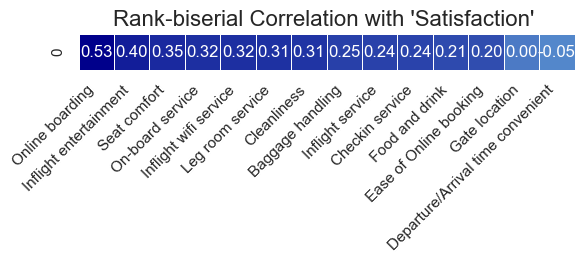

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'correlation_df' contains the correlation values and variable names

# Extracting variable names and Rank-biserial correlation values
variables = correlation_df['Ordinal Variable']
rank_biserial = correlation_df['Rank-biserial Correlation']

# Sort correlations from highest to lowest
sorted_correlations = rank_biserial.sort_values(ascending=False)

# Reshape sorted_correlations into a 1xN array for plotting
correlation_matrix = np.array(sorted_correlations).reshape(1, -1)

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 2))

# Create a custom color map with shades of '#FFD700'
cmap = sns.blend_palette(['#98F5FF', '#00008B'], as_cmap=True)

# Plot the correlation values as a heatmap-style visualization
sns.heatmap(correlation_matrix, cmap=cmap, center=0, annot=True, fmt=".2f", square=True, linewidths=0.5, cbar=False, ax=ax)

# Set the x-axis labels to the variable names
ax.set_xticklabels(variables[sorted_correlations.index], rotation=45, ha='right')

# Set the title of the plot
ax.set_title("Rank-biserial Correlation with 'Satisfaction' ", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

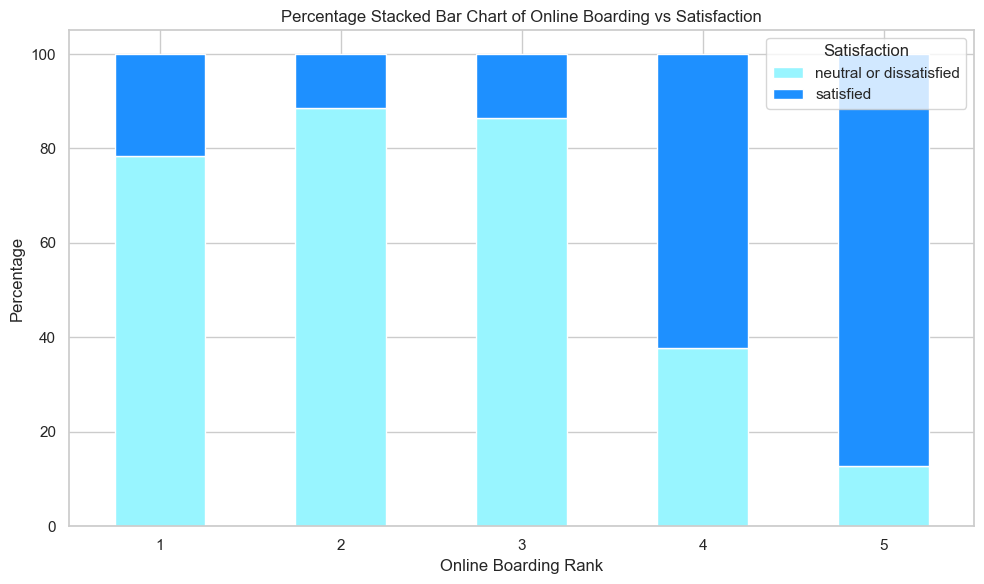

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset containing 'Online Boarding' and 'Satisfaction' columns

# Define the colors for neutral/dissatisfied and satisfied categories
colors = {'neutral or dissatisfied': '#98F5FF', 'satisfied': '#1E90FF'}

# Group data by 'Online Boarding' and 'Satisfaction', then count occurrences
grouped_data = data.groupby(['Online boarding', 'satisfaction']).size().reset_index(name='count')

# Pivot the data to have 'Online Boarding' as index and 'Satisfaction' values as columns
pivot_data = grouped_data.pivot(index='Online boarding', columns='satisfaction', values='count').fillna(0)

# Calculate the total count for each 'Online Boarding' rank
pivot_data['total'] = pivot_data.sum(axis=1)

# Convert counts to percentages for each satisfaction level
for col in pivot_data.columns[:-1]:
    pivot_data[col] = (pivot_data[col] / pivot_data['total']) * 100

# Plotting the stacked bar chart with specified colors
plt.figure(figsize=(10, 6))
pivot_data.drop('total', axis=1).plot(kind='bar', stacked=True, figsize=(10, 6), color=[colors['neutral or dissatisfied'], colors['satisfied']])

# Set plot labels and title
plt.xlabel('Online Boarding Rank')
plt.ylabel('Percentage')
plt.title('Percentage Stacked Bar Chart of Online Boarding vs Satisfaction')

# Show the plot
plt.legend(title='Satisfaction', loc='upper right')
plt.xticks(rotation=0)  # Ensure x-axis labels are not rotated
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

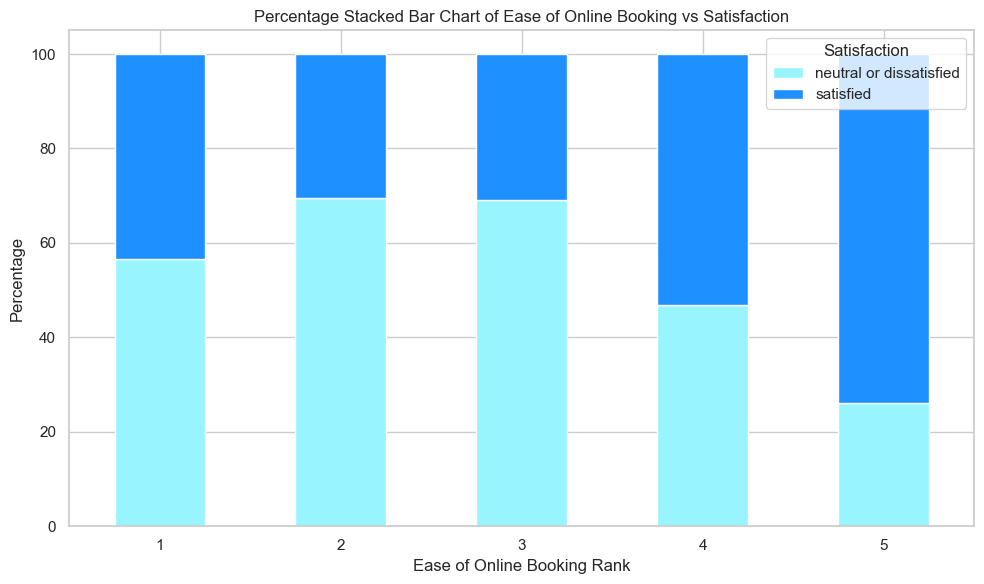

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset containing 'Ease of Online Booking' and 'Satisfaction' columns

# Define the colors for neutral/dissatisfied and satisfied categories
colors = {'neutral or dissatisfied': '#98F5FF', 'satisfied': '#1E90FF'}

# Group data by 'Ease of Online Booking' and 'Satisfaction', then count occurrences
grouped_data_ease = data.groupby(['Ease of Online booking', 'satisfaction']).size().reset_index(name='count')

# Pivot the data to have 'Ease of Online Booking' as index and 'Satisfaction' values as columns
pivot_data_ease = grouped_data_ease.pivot(index='Ease of Online booking', columns='satisfaction', values='count').fillna(0)

# Calculate the total count for each 'Ease of Online Booking' rank
pivot_data_ease['total'] = pivot_data_ease.sum(axis=1)

# Convert counts to percentages for each satisfaction level
for col in pivot_data_ease.columns[:-1]:
    pivot_data_ease[col] = (pivot_data_ease[col] / pivot_data_ease['total']) * 100

# Plotting the stacked bar chart for 'Ease of Online Booking' vs 'Satisfaction' with specified colors
plt.figure(figsize=(10, 6))
pivot_data_ease.drop('total', axis=1).plot(kind='bar', stacked=True, figsize=(10, 6), color=[colors['neutral or dissatisfied'], colors['satisfied']])

# Set plot labels and title
plt.xlabel('Ease of Online Booking Rank')
plt.ylabel('Percentage')
plt.title('Percentage Stacked Bar Chart of Ease of Online Booking vs Satisfaction')

# Show the plot
plt.legend(title='Satisfaction', loc='upper right')
plt.xticks(rotation=0)  # Ensure x-axis labels are not rotated
plt.tight_layout()
plt.show()


Customer Type distribution when Ease of Online Booking Rank is 1:
Loyal Customer       18192
disloyal Customer     3820
Name: Customer Type, dtype: int64

Counts of Inflight Entertainment, Online Boarding, and Inflight Entertainment when Ease of Online Booking Rank is 1:
   Inflight entertainment  Online boarding  Inflight entertainment
1                    2804             9938                    2804
2                    3834             1327                    3834
3                    4181             2133                    4181
4                    6019             4818                    6019
5                    5174             3796                    5174


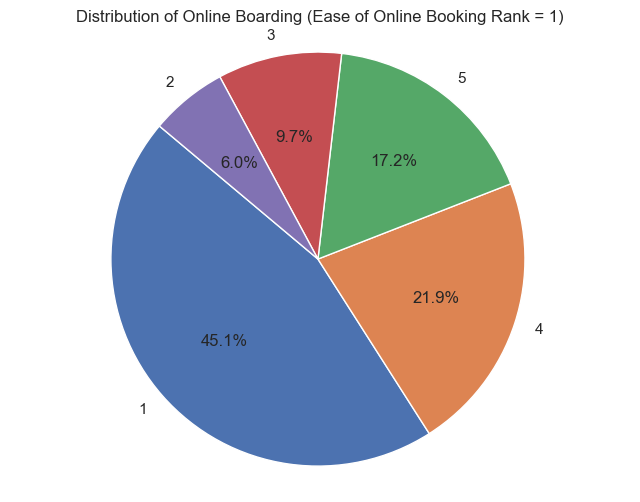

In [41]:
# Assuming 'data' is your dataset containing 'Ease of Online Booking', 'Customer Type', 'Inflight Entertainment', 'Online Boarding', and other columns

# Filter the data for Ease of Online Booking Rank = 1
data_ease_rank1 = data[data['Ease of Online booking'] == 1]

# Show distribution of 'Customer Type' when Ease of Online Booking Rank = 1
customer_type_distribution = data_ease_rank1['Customer Type'].value_counts()
print("Customer Type distribution when Ease of Online Booking Rank is 1:")
print(customer_type_distribution)

# Show counts of 'Inflight Entertainment', 'Online Boarding', and 'Inflight Entertainment' when Ease of Online Booking Rank = 1
counts_ease_rank1 = data_ease_rank1[['Inflight entertainment', 'Online boarding', 'Inflight entertainment']].apply(pd.Series.value_counts)
print("\nCounts of Inflight Entertainment, Online Boarding, and Inflight Entertainment when Ease of Online Booking Rank is 1:")
print(counts_ease_rank1)



import matplotlib.pyplot as plt


# Count the occurrences of each 'Online Boarding' rank in the subset
online_boarding_counts = data_ease_rank1['Online boarding'].value_counts()

# Create a pie chart for 'Online Boarding' distribution
plt.figure(figsize=(8, 6))
plt.pie(online_boarding_counts, labels=online_boarding_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Online Boarding (Ease of Online Booking Rank = 1)')
plt.show()


<Figure size 1000x600 with 0 Axes>

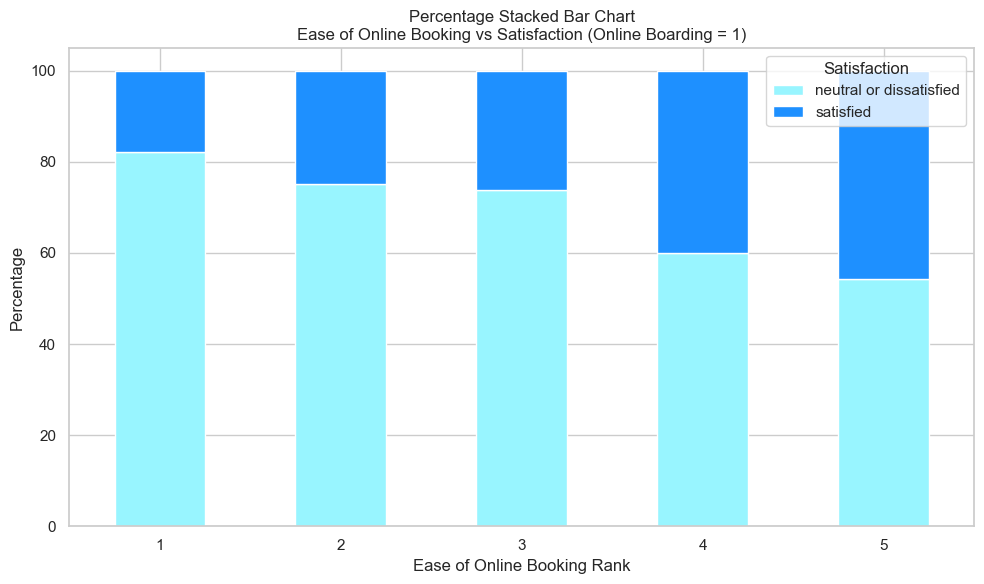

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the colors for neutral/dissatisfied and satisfied categories
colors = {'neutral or dissatisfied': '#98F5FF', 'satisfied': '#1E90FF'}

# Filter the data for Online boarding = 1
data_boarding_1 = data[data['Online boarding'] == 1]

# Group data by 'Ease of Online Booking' and 'Satisfaction', then count occurrences
grouped_data_boarding_1 = data_boarding_1.groupby(['Ease of Online booking', 'satisfaction']).size().reset_index(name='count')

# Pivot the data to have 'Ease of Online Booking' as index and 'Satisfaction' values as columns
pivot_data_boarding_1 = grouped_data_boarding_1.pivot(index='Ease of Online booking', columns='satisfaction', values='count').fillna(0)

# Calculate the total count for each 'Ease of Online Booking' rank
pivot_data_boarding_1['total'] = pivot_data_boarding_1.sum(axis=1)

# Convert counts to percentages for each satisfaction level
for col in pivot_data_boarding_1.columns[:-1]:
    pivot_data_boarding_1[col] = (pivot_data_boarding_1[col] / pivot_data_boarding_1['total']) * 100

# Plotting the stacked bar chart for 'Ease of Online Booking' vs 'Satisfaction' with specified colors
plt.figure(figsize=(10, 6))
pivot_data_boarding_1.drop('total', axis=1).plot(kind='bar', stacked=True, figsize=(10, 6), color=[colors['neutral or dissatisfied'], colors['satisfied']])

# Set plot labels and title
plt.xlabel('Ease of Online Booking Rank')
plt.ylabel('Percentage')
plt.title('Percentage Stacked Bar Chart\nEase of Online Booking vs Satisfaction (Online Boarding = 1)')
plt.legend(title='Satisfaction', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


### Categorical variables 

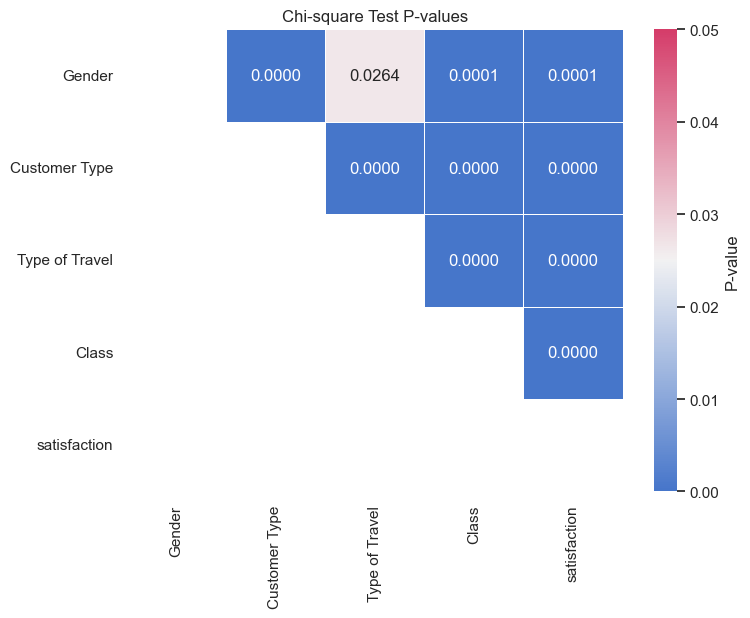

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

# Assuming 'data' is your DataFrame containing the relevant columns
nominal_variables = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

# Create an empty DataFrame to store p-values
p_values_df = pd.DataFrame(index=nominal_variables, columns=nominal_variables)

for col in nominal_variables:
    for row in nominal_variables:
        contingency_table = pd.crosstab(data[row], data[col])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Store p-values in the DataFrame
        p_values_df.loc[row, col] = p

# Convert p-values to numeric for comparison
p_values_df = p_values_df.apply(pd.to_numeric)

# Create a lower triangular mask for the heatmap
mask = np.tril(np.ones_like(p_values_df, dtype=bool))

# Set up the heatmap
plt.figure(figsize=(8, 6))
cmap = sns.diverging_palette(255,0, as_cmap=True)

# Generate the heatmap for the lower triangle
sns.heatmap(p_values_df, mask=mask, cmap=cmap, annot=True, fmt=".4f", linewidths=0.5, 
            cbar_kws={'label': 'P-value'}, vmin=0, vmax=0.05)

# Set the title
plt.title('Chi-square Test P-values')

# Show the plot
plt.show()


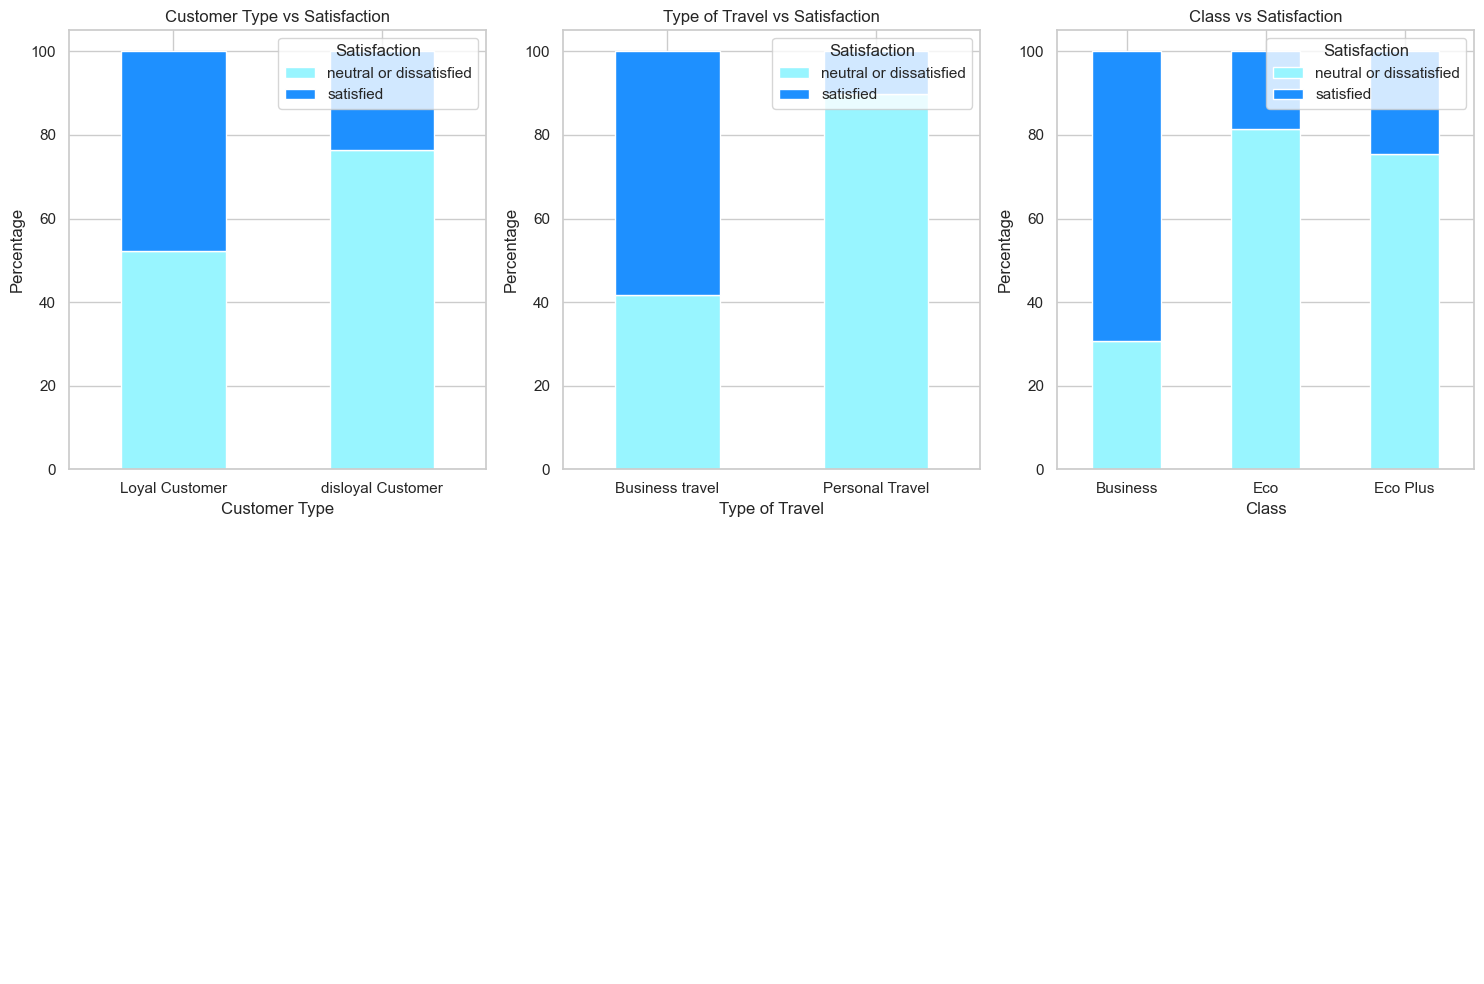

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the colors for neutral/dissatisfied and satisfied categories
colors = {'neutral or dissatisfied': '#98F5FF', 'satisfied': '#1E90FF'}

# Selected variables
selected_variables = ['Customer Type', 'Type of Travel', 'Class']

# Create subplots with desired layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten axes for easier iteration
axes = axes.flatten()

for i, variable in enumerate(selected_variables):
    # Group data by the current variable and 'satisfaction', then count occurrences
    grouped_data = data.groupby([variable, 'satisfaction']).size().unstack().fillna(0)

    # Calculate the total count for each category of the current variable
    grouped_data['total'] = grouped_data.sum(axis=1)

    # Convert counts to percentages for each satisfaction level
    for col in grouped_data.columns[:-1]:
        grouped_data[col] = (grouped_data[col] / grouped_data['total']) * 100

    # Plotting the stacked bar chart with specified colors for the current variable
    grouped_data.drop('total', axis=1).plot(kind='bar', stacked=True, color=[colors['neutral or dissatisfied'], colors['satisfied']], ax=axes[i])
    
    # Set plot labels and title for the current variable
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Percentage')
    axes[i].set_title(f'{variable} vs Satisfaction')
    axes[i].legend(title='Satisfaction', loc='upper right')
    axes[i].tick_params(axis='x', rotation=0)

# Hide extra subplots if there are fewer variables than subplot grid
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout and spacing
plt.tight_layout()
plt.show()


In [47]:
# List of variables for analysis
variables = ['Customer Type', 'Type of Travel', 'Class', 'satisfaction']

# Iterate over each variable and display counts for each gender
for variable in variables:
    print(f"Counts for {variable} based on Gender:")
    gender_counts = data.groupby(['Gender', variable]).size().reset_index(name='count')
    print(gender_counts)
    print("\n")


Counts for Customer Type based on Gender:
   Gender      Customer Type  count
0  Female     Loyal Customer  42458
1  Female  disloyal Customer  10269
2    Male     Loyal Customer  42465
3    Male  disloyal Customer   8712


Counts for Type of Travel based on Gender:
   Gender   Type of Travel  count
0  Female  Business travel  36528
1  Female  Personal Travel  16199
2    Male  Business travel  35127
3    Male  Personal Travel  16050


Counts for Class based on Gender:
   Gender     Class  count
0  Female  Business  24927
1  Female       Eco  23858
2  Female  Eco Plus   3942
3    Male  Business  24738
4    Male       Eco  22887
5    Male  Eco Plus   3552


Counts for satisfaction based on Gender:
   Gender             satisfaction  count
0  Female  neutral or dissatisfied  30193
1  Female                satisfied  22534
2    Male  neutral or dissatisfied  28686
3    Male                satisfied  22491




In [48]:
data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

## PLS

In [49]:
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Select columns based on data type
ordinal_cols = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'
]

categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

continuous_cols = ["Age", 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Separate features and target variable
X = data[ordinal_cols + categorical_cols + continuous_cols]
y_categorical = data['satisfaction']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Use LabelEncoder to convert binary categorical labels into numerical values (0 or 1)
le = LabelEncoder()
y = le.fit_transform(y_categorical)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize or scale your variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize PLS model
pls = PLSRegression(n_components=2)  # Set the number of components as needed

# Fit the model
pls.fit(X_train_scaled, y_train)


PLSRegression()

In [50]:
# Make predictions on the test set
y_pred = pls.predict(X_test_scaled)

# Convert predictions to binary (0 or 1) based on your specific criteria
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.4f}")

# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

Accuracy: 0.8637
Confusion Matrix:
[[10411  1302]
 [ 1530  7538]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     11713
           1       0.85      0.83      0.84      9068

    accuracy                           0.86     20781
   macro avg       0.86      0.86      0.86     20781
weighted avg       0.86      0.86      0.86     20781



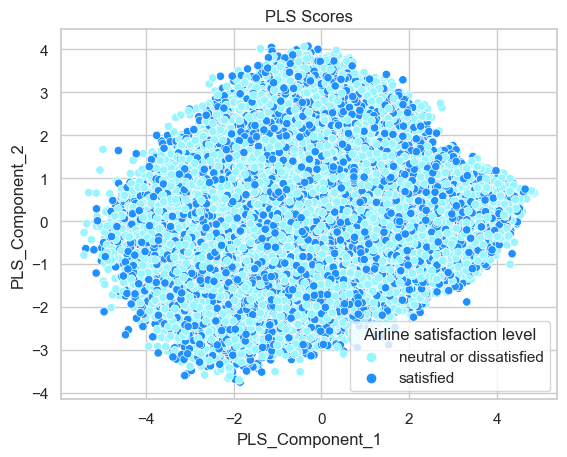

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the colors for neutral/dissatisfied and satisfied categories
colors = {'neutral or dissatisfied': '#98F5FF', 'satisfied': '#1E90FF'}

# Get PLS scores
pls_scores = pls.transform(X_train_scaled)

# Create a DataFrame for PLS scores
scores_df = pd.DataFrame(pls_scores, columns=['PLS_Component_1', 'PLS_Component_2'])
scores_df['Airline satisfaction level'] = y_categorical

# Plot PLS scores with specified colors
sns.scatterplot(x='PLS_Component_1', y='PLS_Component_2', hue='Airline satisfaction level', palette=colors, data=scores_df)
plt.title('PLS Scores')
plt.show()


In [52]:
# Calculate the total variance of the scaled input features
total_var_X = np.var(X_train_scaled, axis=0).sum()

# Calculate the variance explained by each component for X
var_explained_1_X = np.var(pls.x_scores_[:, 0])
var_explained_2_X = np.var(pls.x_scores_[:, 1])

# Calculate the proportion of total variance explained by each component for X
var_explained_1_X_pct = (var_explained_1_X / total_var_X) * 100
var_explained_2_X_pct = (var_explained_2_X / total_var_X) * 100

# Add the proportion of variation explained by each component to the title
var_explained = f'{var_explained_1_X_pct:.2f}% of X variance (Component 1), {var_explained_2_X_pct:.2f}% of X variance (Component 2)'


# Print the explained variance values for X
print(f"Proportion of variance explained by first PLS component for X: {var_explained_1_X_pct:.2f}%")
print(f"Proportion of variance explained by second PLS component for X: {var_explained_2_X_pct:.2f}%")



Proportion of variance explained by first PLS component for X: 16.23%
Proportion of variance explained by second PLS component for X: 6.83%


In [53]:
loadings = pd.DataFrame(pls.x_loadings_)
num_features = X_train.shape[1]  # Number of features in your dataset
num_components = loadings.shape[1]  # Number of PLS components

In [54]:
loadings.shape

(23, 2)

In [55]:
x_loadings=pls.x_loadings_
y_loadings=pls.y_loadings_

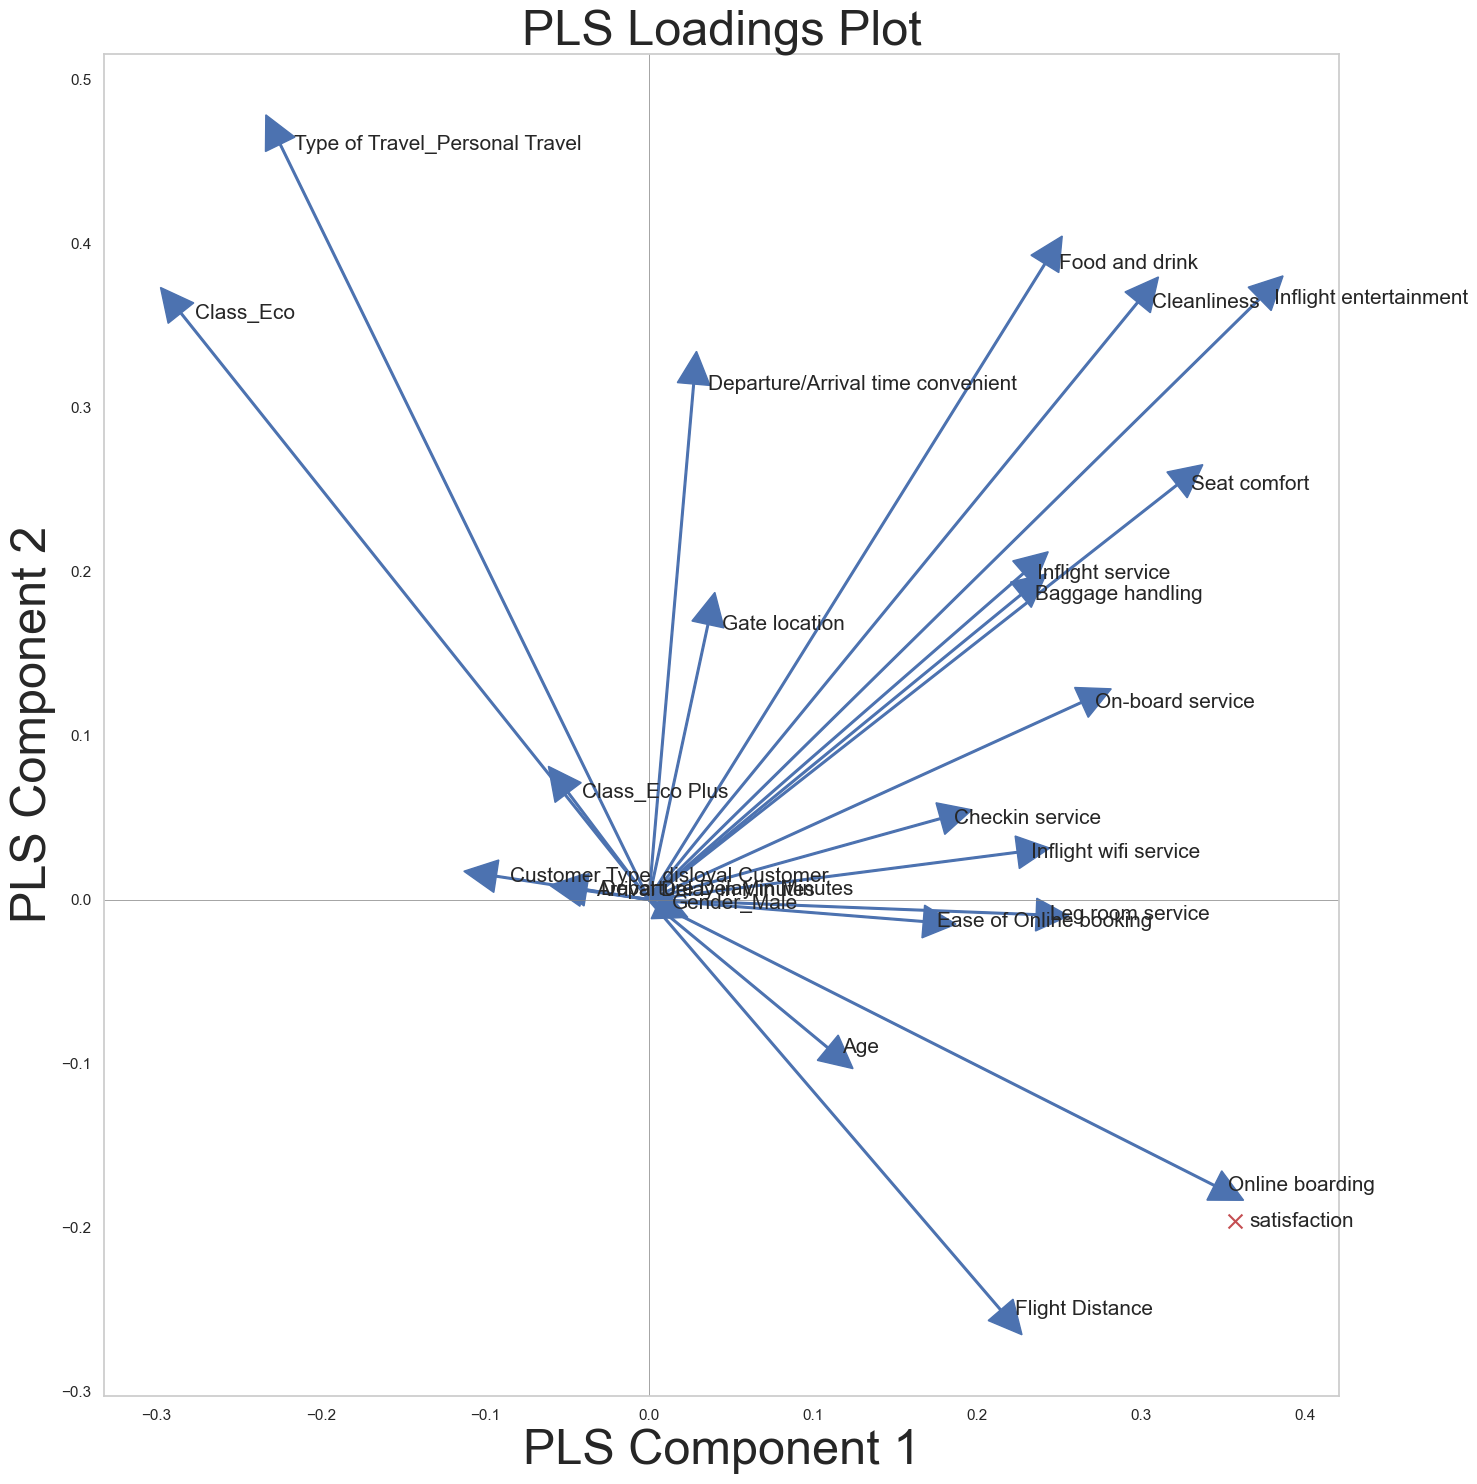

In [56]:
plt.figure(figsize=(15, 15))
feature_names = X.columns.tolist()

# Plot predictor variable loadings
for i in range(num_features):
    plt.arrow(0, 0, x_loadings[i, 0], x_loadings[i, 1], head_width=0.02, head_length=0.02, fc='b', ec='b')
    plt.annotate(feature_names[i], xy=(x_loadings[i, 0], x_loadings[i, 1]), xytext=(10, 0), textcoords='offset points', ha='left', va='center', fontsize=15)

# Plot response variable loading (as a red cross)
plt.scatter(y_loadings[0, 0], y_loadings[0, 1], color='r', marker='x', s=100)
plt.annotate('satisfaction', xy=(y_loadings[0, 0], y_loadings[0, 1]), xytext=(10, 0), textcoords='offset points', ha='left', va='center', fontsize=15)

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('PLS Component 1', fontsize=35)
plt.ylabel('PLS Component 2', fontsize=35)
plt.title('PLS Loadings Plot', fontsize=35)
plt.grid()
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.tight_layout()
plt.show()

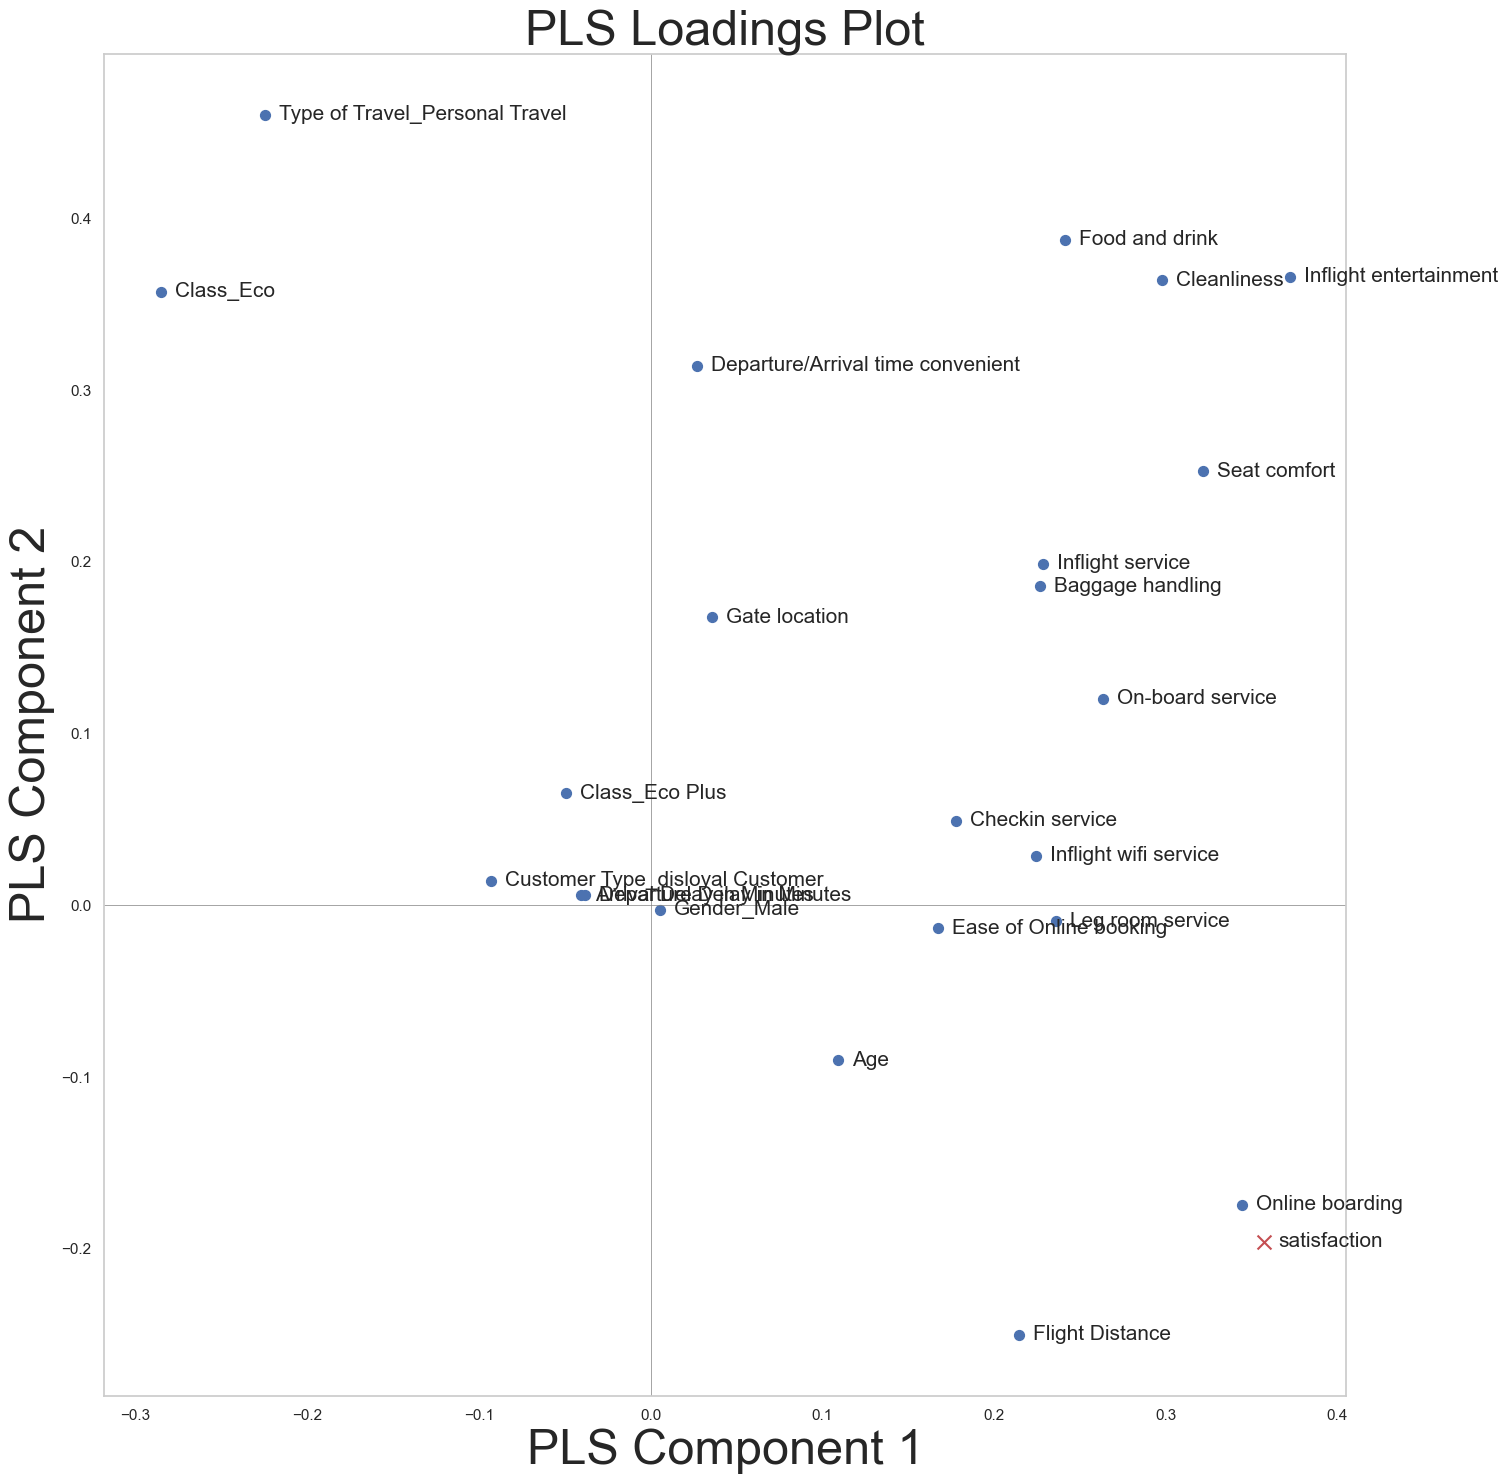

In [57]:
plt.figure(figsize=(20, 15))
feature_names = X.columns.tolist()
# Plot details
ax.axhline(y=0, linestyle='--', color='gray')
ax.axvline(x=0, linestyle='--', color='gray')
# Plot predictor variable dots
plt.scatter(x_loadings[:, 0], x_loadings[:, 1], color='b', s=50)

# Plot response variable loading (as a red cross)
plt.scatter(y_loadings[0, 0], y_loadings[0, 1], color='r', marker='x', s=100)
plt.annotate('satisfaction', xy=(y_loadings[0, 0], y_loadings[0, 1]), xytext=(10, 0), textcoords='offset points', ha='left', va='center', fontsize=15)

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('PLS Component 1', fontsize=35)
plt.ylabel('PLS Component 2', fontsize=35)
plt.title('PLS Loadings Plot', fontsize=35)
plt.grid()
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)

# Annotate the dots with feature names
for i, txt in enumerate(feature_names):
    plt.annotate(txt, (x_loadings[i, 0], x_loadings[i, 1]), xytext=(10, 0), textcoords='offset points', ha='left', va='center', fontsize=15)

plt.tight_layout()
plt.show()


In [63]:
X.columns

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'Age',
       'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

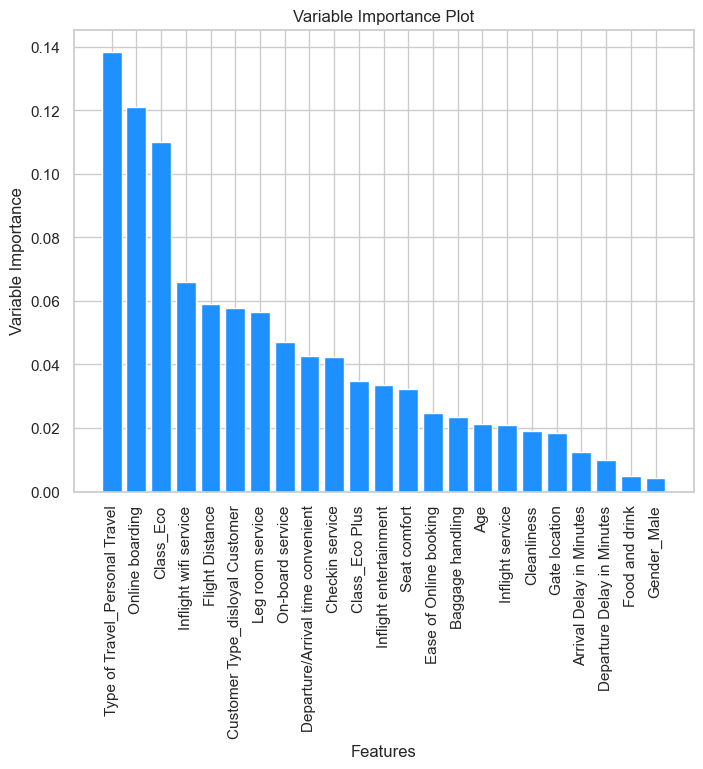

In [65]:
# Calculate the variable importance scores
vip = np.abs(pls.coef_).sum(axis=1)

# Normalize the scores
vip /= vip.sum()

# Sort the scores in descending order and get the corresponding feature names
sorted_idx = np.argsort(vip)[::-1]
sorted_features = np.array(X.columns)[sorted_idx]

# Plot the scores
plt.figure(figsize=(8, 6))
plt.bar(sorted_features, vip[sorted_idx], color='#1E90FF')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Variable Importance')
plt.title('Variable Importance Plot')
plt.show()

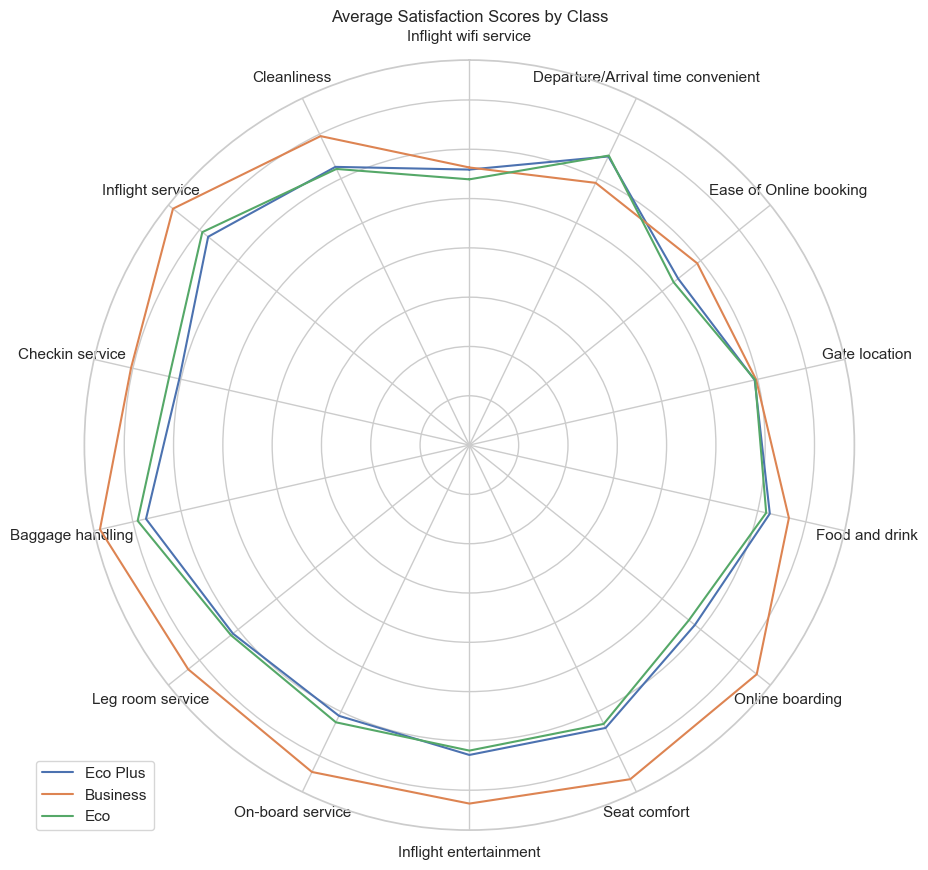

In [58]:
## ## Analyzing satisfaction variables by Class(Business/Eco/Eco plus)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# List of correct variable names for radar chart
satisfaction_variables = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

# List of classes
classes = data['Class'].unique()

# Calculate average satisfaction scores for each variable and class
average_scores = {}
for variable in satisfaction_variables:
    scores_by_class = [data[data['Class'] == cls][variable].mean() for cls in classes]
    average_scores[variable] = scores_by_class

# Plot the radar chart with correct variable names and axis labels
num_vars = len(satisfaction_variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # To close the polygon

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

# Plot each class
for i, cls in enumerate(classes):
    values = [average_scores[variable][i] for variable in satisfaction_variables]
    values += values[:1]  # To close the polygon
    ax.plot(angles, values, label=cls)

# Add axis labels
ax.set_thetagrids(np.linspace(0, 360, num_vars, endpoint=False), satisfaction_variables)

ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Average Satisfaction Scores by Class')
plt.show()

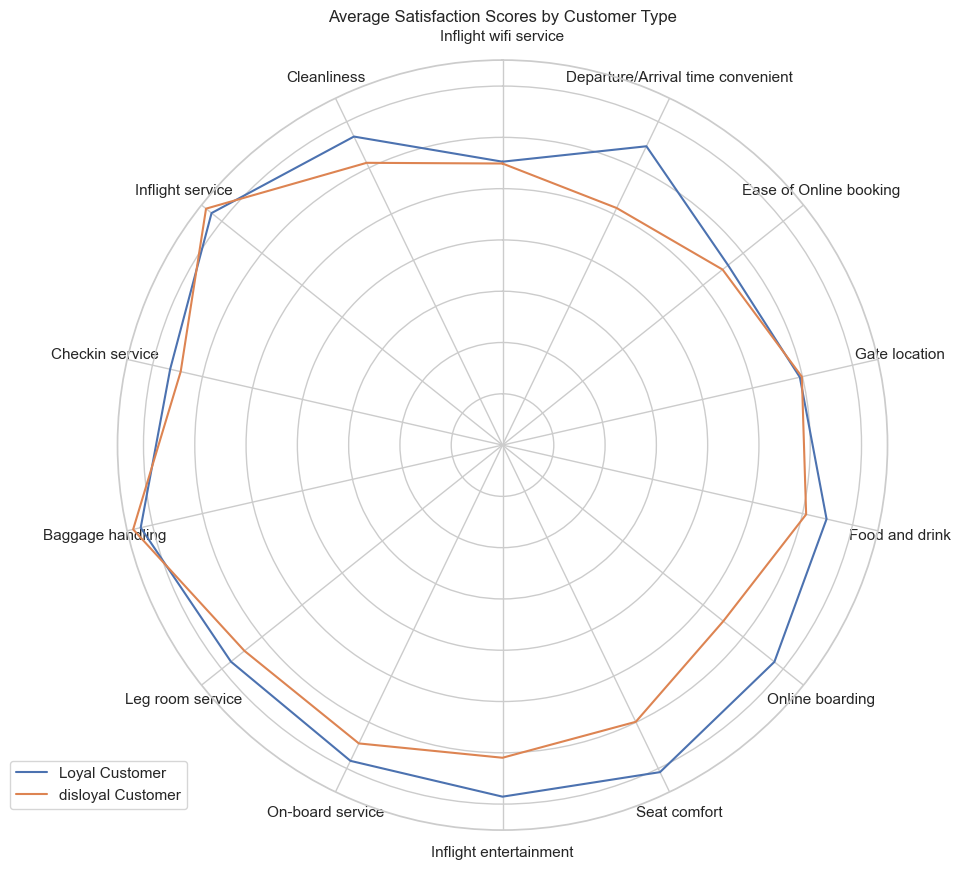

In [66]:
## Analyzing satisfaction variables by Customer type(loyal/disloyal)

# List of correct variable names for radar chart
satisfaction_variables = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

# List of customer types
customer_types = data['Customer Type'].unique()

# Calculate average satisfaction scores for each variable and customer type
average_scores = {}
for variable in satisfaction_variables:
    scores_by_customer_type = [data[data['Customer Type'] == ctype][variable].mean() for ctype in customer_types]
    average_scores[variable] = scores_by_customer_type

# Plot the radar chart with correct variable names and axis labels
num_vars = len(satisfaction_variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # To close the polygon

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

# Plot each customer type
for i, ctype in enumerate(customer_types):
    values = [average_scores[variable][i] for variable in satisfaction_variables]
    values += values[:1]  # To close the polygon
    ax.plot(angles, values, label=ctype)

# Add axis labels
ax.set_thetagrids(np.linspace(0, 360, num_vars, endpoint=False), satisfaction_variables)

ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Average Satisfaction Scores by Customer Type')
plt.show()

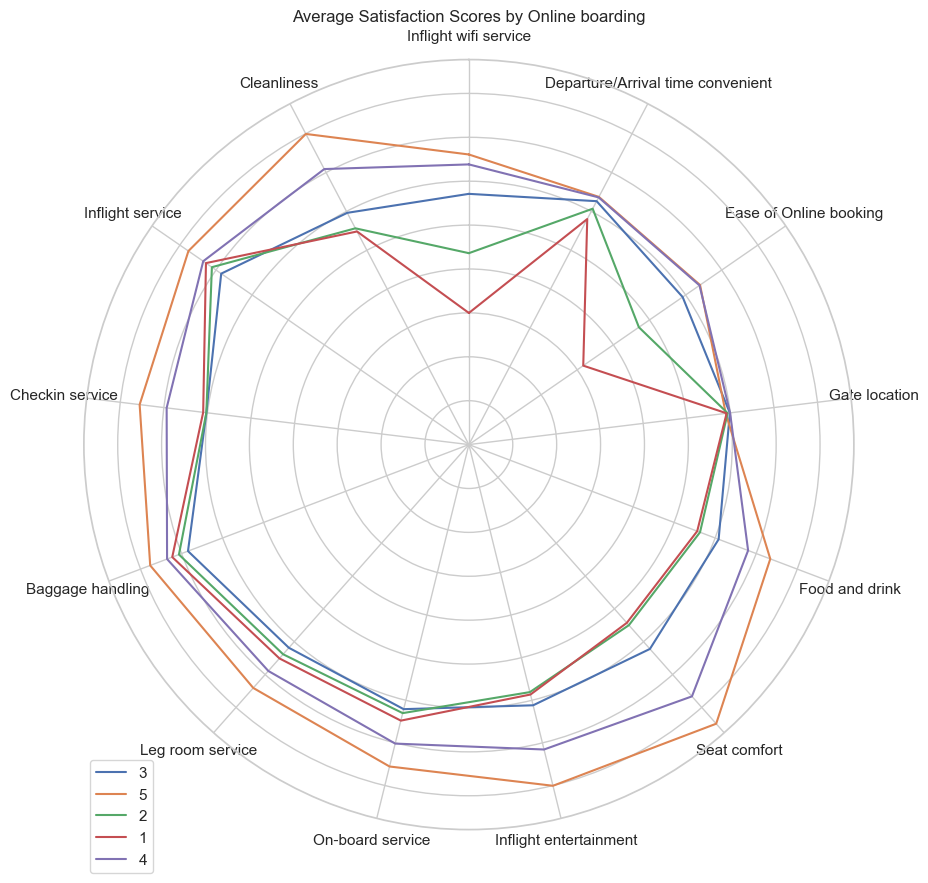

In [69]:
## Analyzing satisfaction variables by Customer type(loyal/disloyal)

# List of correct variable names for radar chart
satisfaction_variables = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]


# List of customer types
customer_types = data['Online boarding'].unique()

# Calculate average satisfaction scores for each variable and customer type
average_scores = {}
for variable in satisfaction_variables:
    scores_by_customer_type = [data[data['Online boarding'] == ctype][variable].mean() for ctype in customer_types]
    average_scores[variable] = scores_by_customer_type

# Plot the radar chart with correct variable names and axis labels
num_vars = len(satisfaction_variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # To close the polygon

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

# Plot each customer type
for i, ctype in enumerate(customer_types):
    values = [average_scores[variable][i] for variable in satisfaction_variables]
    values += values[:1]  # To close the polygon
    ax.plot(angles, values, label=ctype)

# Add axis labels
ax.set_thetagrids(np.linspace(0, 360, num_vars, endpoint=False), satisfaction_variables)

ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Average Satisfaction Scores by Online boarding')
plt.show()